<img src='images/gesis.png' style='height: 50px; float: left'>
<img src='images/social_comquant.png' style='height: 50px; float: left; margin-left: 40px'>

## Introduction to Computational Social Science methods with Python

# Session 7. Network analysis

Brockman on distance in networks (https://www.science.org/doi/abs/10.1126/science.1245200)

Facebook Small-World study

https://www.nature.com/articles/s41598-018-26951-y

Fariba's paper on perception biases

CHECK PLATT'S BOOK

https://github.com/briatte/awesome-network-analysis

...

<div class='alert alert-block alert-success'>
<b>In this session</b>, 

you will learn how you can ...
</div>

## 7.1. Micro-level analysis

McLevey (2022, chapter 13) on walk structure and network flow; relevant for centrality; Zweig on network literacy

McLevey (2022, chapter 15) on shortest paths, betweenness centrality, degree centrality, eigenvector centrality, power centrality



In [1]:
import pickle

In [2]:
with open('../data/CNS/G_cns_fb_lcc.pickle', 'rb') as f:
    G_fb = pickle.load(f)
with open('../data/CNS/G_cns_mobile_week1_lcc.pickle', 'rb') as f:
    G_mobile = pickle.load(f)
with open('../data/CNS/G_cns_mobile_week1_lcc_unlayered.pickle', 'rb') as f:
    G_mobile_unlayered = pickle.load(f)
with open('../data/CNS/G_cns_mobile_week1_lcc_undirected.pickle', 'rb') as f:
    G_mobile_undirected = pickle.load(f)
with open('../data/CNS/G_cns_mobile_week1_lcc_unlayered_undirected.pickle', 'rb') as f:
    G_mobile_unlayered_undirected = pickle.load(f)
with open('../data/CNS/G_cns_bt_f2f_p_lcc.pickle', 'rb') as f:
    G_bt = pickle.load(f)
with open('../data/CNS/G_cns_bt_f2f_p_lcc_unlayered.pickle', 'rb') as f:
    G_bt_unlayered = pickle.load(f)

In [3]:
import pandas as pd

In [4]:
nodelist_fb = pd.DataFrame(index=G_fb.nodes())
nodelist_mobile = pd.DataFrame(index=G_mobile.nodes())
nodelist_bt = pd.DataFrame(index=G_bt.nodes())

In [5]:
# ad basic description (e.g., density)

### 7.1.1. Centrality analysis

The big picture: McLevey 15.4

> [A] centrality index is a real-valued function on the nodes of a graph, i.e., it assigns a number to all nodes. This value is only depending on the structure of the graph, not on external parameters associated with the nodes. (Zweig, K.A. 2016. Network Analysis Literacy (p.245). Springer.)

A centrality index quantifies a node's involvement in a given set of walks.

> In network analysis, we are often interested in whether something (e.g. information about the ominous-sounding agenda item) can travel from node i (e.g. Anika) to node j (e.g. Patrick). If it is indeed possible for that to happen, how many people would it have to go through to get there? And is there more than one way it might get there? If so, are some ways more efficient than others? If so, which ones? We can answer questions such as these about any nodes in a network by invoking the concept of a walk, which also provides both general and specific terminology for describing a wide variety of indirect relationships (Borgatti and Everett, 2020). (McLevey 2022, ch.13.6)

Walk: sequence of edges which joins a sequence of vertices (https://en.wikipedia.org/wiki/Path_(graph_theory))

(Platt, ch. 5)

#### Degree centrality

The __degree__ is the number of ties a node has.

The __degree centrality__ for a node _v_ is the fraction of nodes it is connected to. It measures potential communication activity. 

#### In-degree centrality
The __in-degree centrality__ for a node _v_ is the fraction of nodes its incoming edges are connected to.

#### Out-degree centrality
The __out-degree centrality__ for a node _v_ is the fraction of nodes its outgoing edges are connected to.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [7]:
import networkx as nx

In [8]:
[node for node in nx.neighbors(G=G_mobile_unlayered_undirected, n=4)]

[424, 221, 344, 266]

https://stackoverflow.com/questions/60067022/multidigraph-edges-from-networkx-draw-with-connectionstyle

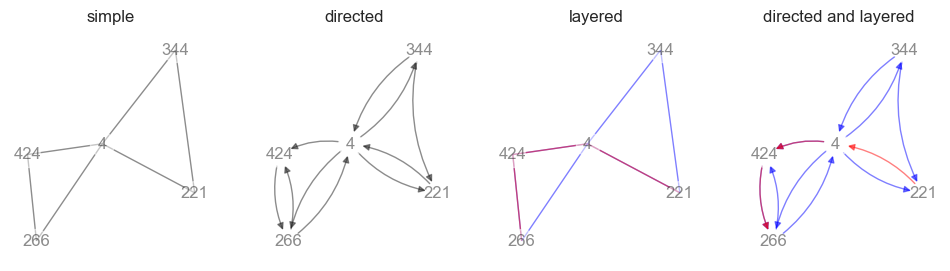

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
axs[0].set_title('simple')
nx.draw(
    G = G_mobile_unlayered_undirected.subgraph(nodes=[4, 221, 266, 344, 424]), 
    ax = axs[0], 
    pos = nx.get_node_attributes(G=G_mobile_unlayered_undirected, name='pos'), 
    with_labels = True, 
    node_color = 'white', 
    alpha = .5, 
    #edge_color = [key for u, v, key in G_mobile_unlayered_undirected.subgraph(nodes=[4, 221, 266, 344, 424]).edges.keys()], 
    edge_cmap = plt.cm.bwr, 
    connectionstyle = 'arc3, rad=0.2'
)
axs[1].set_title('directed')
nx.draw(
    G = G_mobile_unlayered.subgraph(nodes=[4, 221, 266, 344, 424]), 
    ax = axs[1], 
    pos = nx.get_node_attributes(G=G_mobile_unlayered, name='pos'), 
    with_labels = True, 
    node_color = 'white', 
    alpha = .5, 
    #edge_color = [key for u, v, key in G_mobile_unlayered.subgraph(nodes=[4, 221, 266, 344, 424]).edges.keys()], 
    edge_cmap = plt.cm.bwr, 
    connectionstyle = 'arc3, rad=0.2'
)
axs[2].set_title('layered')
nx.draw(
    G = G_mobile_undirected.subgraph(nodes=[4, 221, 266, 344, 424]), 
    ax = axs[2], 
    pos = nx.get_node_attributes(G=G_mobile_undirected, name='pos'), 
    with_labels = True, 
    node_color = 'white', 
    alpha = .5, 
    edge_color = [key for u, v, key in G_mobile_undirected.subgraph(nodes=[4, 221, 266, 344, 424]).edges.keys()], 
    edge_cmap = plt.cm.bwr, 
    connectionstyle = 'arc3, rad=0.2'
)
axs[3].set_title('directed and layered')
nx.draw(
    G = G_mobile.subgraph(nodes=[4, 221, 266, 344, 424]), 
    ax = axs[3], 
    pos = nx.get_node_attributes(G=G_mobile, name='pos'), 
    with_labels = True, 
    node_color = 'white', 
    alpha = .5, 
    edge_color = [key for u, v, key in G_mobile.subgraph(nodes=[4, 221, 266, 344, 424]).edges.keys()], 
    edge_cmap = plt.cm.bwr, 
    connectionstyle = 'arc3, rad=0.2'
)

In [10]:
n = 4

In [11]:
G_mobile_undirected.degree()[n]

6

In [12]:
[node for node in nx.neighbors(G=G_mobile_unlayered_undirected, n=n)]

[424, 221, 344, 266]

In [13]:
G_mobile_unlayered.in_degree()[n]

3

In [14]:
G_mobile_unlayered.out_degree()[n]

4

In [15]:
G_mobile_unlayered_undirected.degree(weight='weight')[n]

8.848592523524871

In [16]:
degree_mobile = nx.degree_centrality(G=G_mobile_unlayered_undirected)
#in_degree_mobile = nx.in_degree_centrality(G=G_mobile_unlayered)
#out_degree_mobile = nx.out_degree_centrality(G=G_mobile_unlayered)

#weighted_degree = G_mobile_unlayered_undirected.degree(weight='weight')
#weighted_in_degree = G_mobile_unlayered.in_degree(weight='weight')
#weighted_out_degree = G_mobile_unlayered.out_degree(weight='weight')

In [17]:
nodelist_mobile['degree'] = degree_mobile.values()
#nodelist_mobile['in_degree'] = in_degree_mobile.values()
#nodelist_mobile['out_degree'] = out_degree_mobile.values()

#nodelist_mobile['weighted_degree'] = weighted_degree_mobile.values()
#nodelist_mobile['weighted_in_degree'] = weighted_in_degree_mobile.values()
#nodelist_mobile['weighted_out_degree'] = weighted_out_degree_mobile.values()

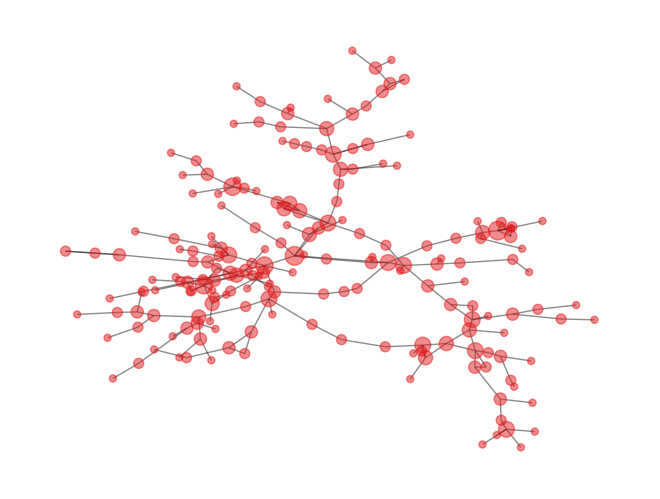

In [18]:
nx.draw(
    G = G_mobile_unlayered_undirected, 
    pos = nx.get_node_attributes(G=G_mobile_unlayered_undirected, name='pos'), 
    node_size = [5000*k for k in nodelist_mobile['degree']], 
    node_color = '#e41a1c', 
    alpha = .5
)

#### Closeness centrality

The concept of walks is a way to think about distance in network terms.

Introduce paths and shortest paths

Introduce radial and length

This is based on the assumption that important nodes are close to other nodes. These metrics measure potential independence or efficiency.

__Closeness centrality__ of a node _u_ is the reciprocal of the average shortest path distance to _u_ over all _n-1_ reachable nodes. 
> Notice that the closeness distance function computes the incoming distance to _u_ for directed graphs. To use outward distance, act on _G.reverse()_.

`closeness_centrality(G, u=None, distance=None)` where `u` is node for which centrality should be calculated and `distance` edge attribute name that should be used to calculate distance in shortest pathes.

Clothenes centrality do not differentiate between multiplex and singleplex network, i.e, multiple edges are not taken into account.  

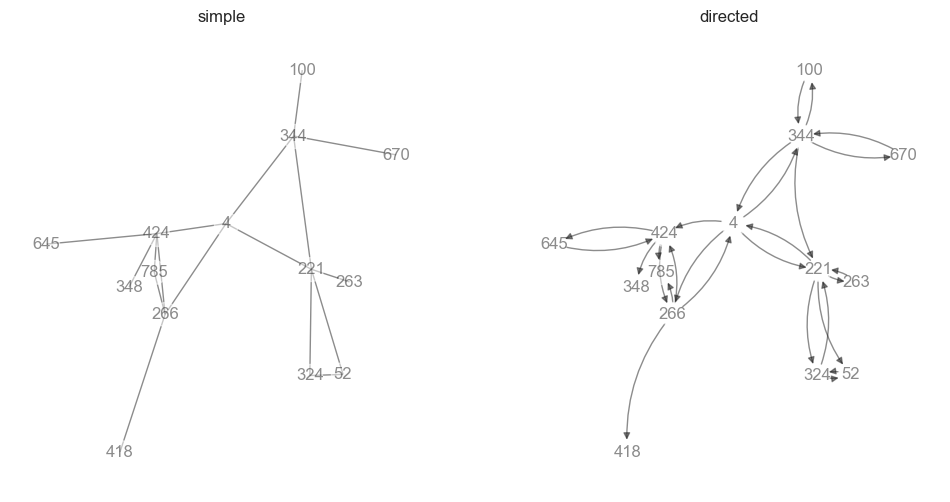

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_title('simple')
nx.draw(
    G = G_mobile_unlayered_undirected.subgraph(nodes=[4, 52, 100, 221, 263, 266, 324, 344, 348, 418, 424, 645, 670, 785]), 
    ax = axs[0], 
    pos = nx.get_node_attributes(G=G_mobile_unlayered_undirected, name='pos'), 
    with_labels = True, 
    node_color = 'white', 
    alpha = .5, 
    connectionstyle = 'arc3, rad=0.2'
)
axs[1].set_title('directed')
nx.draw(
    G = G_mobile_unlayered.subgraph(nodes=[4, 52, 100, 221, 263, 266, 324, 344, 348, 418, 424, 645, 670, 785]), 
    ax = axs[1], 
    pos = nx.get_node_attributes(G=G_mobile_unlayered, name='pos'), 
    with_labels = True, 
    node_color = 'white', 
    alpha = .5, 
    connectionstyle = 'arc3, rad=0.2'
)

In [20]:
closeness_mobile = nx.closeness_centrality(G=G_mobile_unlayered_undirected)
#in_closeness_mobile = nx.closeness_centrality(G=G_mobile_unlayered)
#out_closeness_mobile = nx.closeness_centrality(G=G_mobile_unlayered.reverse())

In [21]:
nodelist_mobile['closeness'] = closeness_mobile.values()
#nodelist_mobile['in_closeness'] = in_closeness_mobile.values()
#nodelist_mobile['out_closeness'] = out_closeness_mobile.values()

Distance

Clotheness centrality was defined as the inverse of farness, which in turn, is the sum of distances to all other nodes [1]. The intent behind this measure was to identify the nodes which could reach others quickly [2]. 

The weights of edges could be considered as costs in the shortest pathes calculation. The least costly path connecting two nodes was the shortest path between them. To create a closeness measure, one should inverte the numbers (1 divided by the weight). Thus, a high weight is transformed into a low closeness, and a low weight is transformed into a high closeness.



1. Freeman, L. C., 1978. Centrality in social networks: Conceptual clarification. Social Networks 1, 215-239.
2. Opsahl, T., Agneessens, F., Skvoretz, J., 2010. Node centrality in weighted networks: Generalizing degree and shortest paths. Social Networks 32 (3), 245-251.


In [22]:
for u, v, data in G_mobile_unlayered_undirected.edges(data=True):
    data['distance'] = 1 / data['weight']

for u, v, data in G_mobile_unlayered.edges(data=True):
    data['distance'] = 1 / data['weight']

In [23]:
#weighted_closeness_mobile = nx.closeness_centrality(G=G_mobile_unlayered_undirected, distance='distance')
#weighted_in_closeness_mobile = nx.closeness_centrality(G=G_mobile_unlayered, distance='distance')
#weighted_out_closeness_mobile = nx.closeness_centrality(G=G_mobile_unlayered.reverse(), distance='distance')

In [24]:
#nodelist_mobile['weighted_closeness'] = weighted_closeness_mobile.values()
#nodelist_mobile['weighted_in_closeness'] = weighted_in_closeness_mobile.values()
#nodelist_mobile['weighted_out_closeness'] = weighted_out_closeness_mobile.values()

In [25]:
nodelist_mobile

degree  closeness
512  0.025907   0.142751
0    0.010363   0.127815
4    0.020725   0.108488
6    0.010363   0.116405
521  0.010363   0.134121
..        ...        ...
486  0.005181   0.143388
491  0.015544   0.104212
492  0.020725   0.098419
503  0.020725   0.098269
505  0.005181   0.076375

[194 rows x 2 columns]

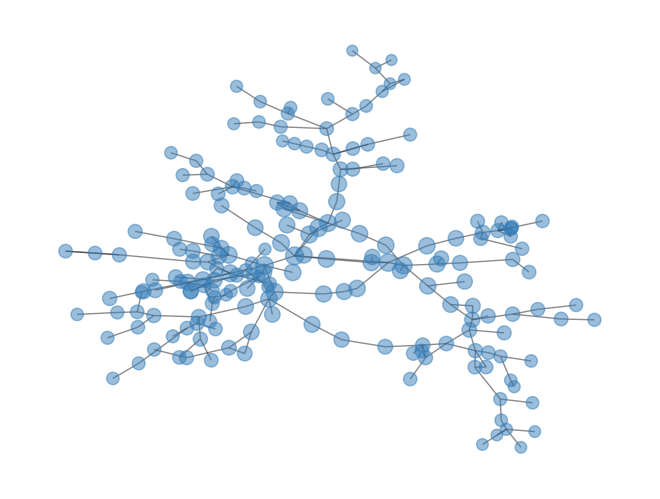

In [26]:
nx.draw(
    G = G_mobile_unlayered_undirected, 
    pos = nx.get_node_attributes(G=G_mobile_unlayered_undirected, name='pos'), 
    node_size = [1000*k for k in nodelist_mobile['closeness']], 
    node_color = '#377eb8', 
    alpha = .5
)

#### Betweenness centrality

Introduce medial

In [27]:
shortest_path = nx.shortest_path(G_mobile_unlayered_undirected, source=383, target=656)
shortest_path

[383,
 682,
 405,
 688,
 158,
 415,
 485,
 472,
 90,
 358,
 521,
 268,
 611,
 176,
 401,
 190,
 372,
 193,
 179,
 656]

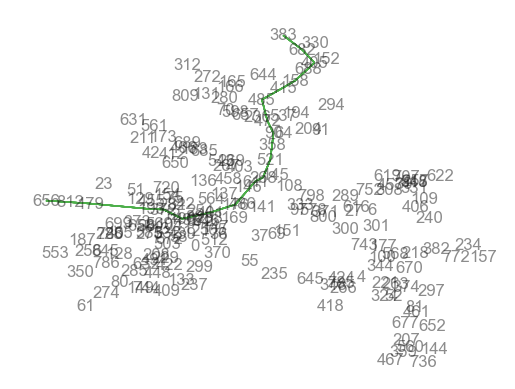

In [28]:
nx.draw_networkx_nodes(
    G = G_mobile_unlayered_undirected, 
    pos = nx.get_node_attributes(G=G_mobile_unlayered_undirected, name='pos'), 
    alpha = 0.
)
nx.draw_networkx_labels(
    G = G_mobile_unlayered_undirected, 
    pos = nx.get_node_attributes(G=G_mobile_unlayered_undirected, name='pos'), 
    alpha = .5
)
for e in range(len(shortest_path) - 1):
    nx.draw_networkx_edges(
        G = G_mobile_unlayered_undirected.subgraph(shortest_path), 
        pos = nx.get_node_attributes(G=G_mobile_unlayered_undirected, name='pos'), 
        alpha = .5, 
        edge_color = '#4daf4a'
    )
plt.box(False)

It assumes that important nodes connect other nodes. These metrics measure potential control. 

__Betweenness centrality__ of a node _v_ is the sum of the fraction of all-pairs shortest paths that pass through _v_.

`betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)` where `k` size of random samples to estimate betweenness, `weight` is the name of the attribute that should be used as distance metric and `seed` is random number generation state. 

More detail here https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html

In [29]:
betweenness_mobile = nx.betweenness_centrality(G=G_mobile_unlayered_undirected, normalized=True)
#directed_betweenness_mobile = nx.betweenness_centrality(G=G_mobile_unlayered, normalized=True)

#weighted_betweenness_mobile = nx.betweenness_centrality(G=G_mobile_unlayered_undirected, normalized=True, weight='distance')
#weighted_directed_betweenness_mobile = nx.betweenness_centrality(G=G_mobile_unlayered, normalized=True, weight='distance')

In [30]:
nodelist_mobile['betweenness'] = betweenness_mobile.values()
#nodelist_mobile['directed_betweenness'] = directed_betweenness_mobile.values()

#nodelist_mobile['weighted_betweenness'] = weighted_betweenness_mobile.values()
#nodelist_mobile['weighted_directed_betweenness'] = weighted_directed_betweenness_mobile.values()

Edge betweenness centrality

It assumes that important edges connect with many other nodes from different "clusters".  

Betweenness centrality of an edge `e` is the sum of the fraction of all-pairs shortest paths that pass through `e`.

`edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None)` 

More details find here https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html

In [31]:
edge_betweenness = nx.edge_betweenness_centrality(G=G_mobile_unlayered_undirected, normalized=True)

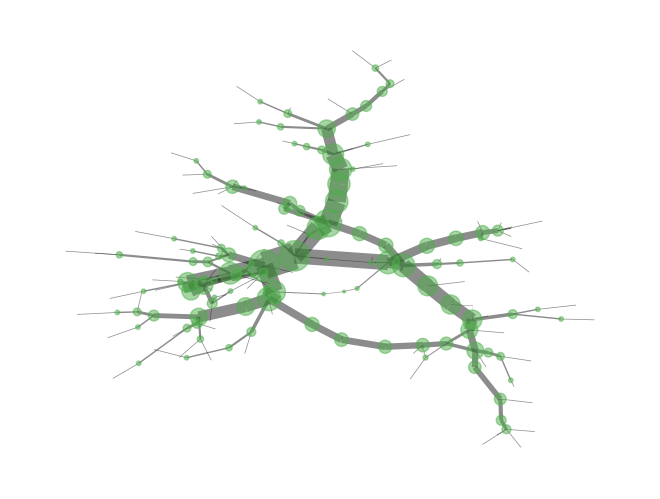

In [32]:
nx.draw(
    G = G_mobile_unlayered_undirected, 
    pos = nx.get_node_attributes(G=G_mobile_unlayered_undirected, name='pos'), 
    node_size = [1000*k for k in nodelist_mobile['betweenness']], 
    node_color = '#4daf4a', 
    width = [50 * e for e in edge_betweenness.values()], 
    alpha = .5
)

BOX

Eigenvector cenrality (Platt 71)

### 7.1.2. Closure and brokerage

#### Closure
#### Clustering coefficient

Transitivity (Platt 74)

The clustering coefficient $CC(x)$ quantifies the **extent to which potential edges in a node’s neighborhood are realized**. It is a purely local measure, i.e., it only takes the immediate neighborhood of $x$ into account:

In [33]:
clustering_mobile = nx.clustering(G=G_mobile_unlayered_undirected)

#weighted_clustering_mobile = nx.clustering(G=G_mobile_unlayered_undirected, weight='weight')

In [34]:
nodelist_mobile['clustering'] = clustering_mobile.values()

#nodelist_mobile['weighted_clustering'] = weighted_clustering_mobile.values()

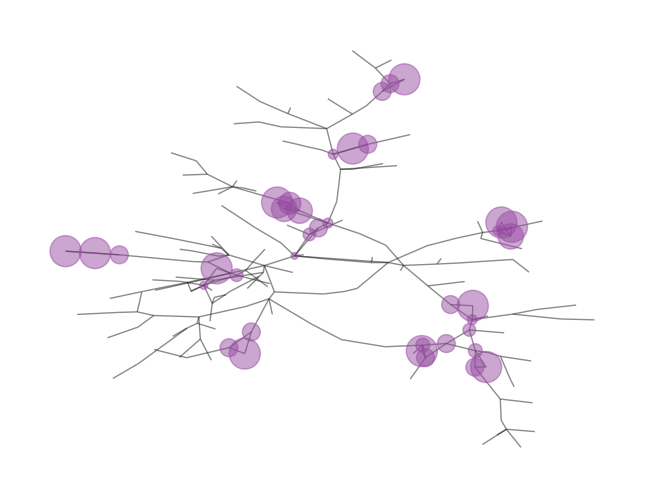

In [35]:
nx.draw(
    G = G_mobile_unlayered_undirected, 
    pos = nx.get_node_attributes(G=G_mobile_unlayered_undirected, name='pos'), 
    node_size = [500*k for k in nodelist_mobile['clustering']], 
    node_color = '#984ea3', 
    alpha = .5
)

#### Local efficiency
Node local efficiency $E(x)$ is a generalization of the clustering coefficient. It quantifies the **extent to which neighbors of a node x can reach each other if x was removed**. It is a purely local measure:

In [36]:
def node_local_efficiency(G):
    d = {}
    for n in G.nodes():
        d[n] = nx.global_efficiency(G=nx.subgraph(G=G, nbunch=list(nx.neighbors(G=G, n=n))))
    return d

In [37]:
node_local_efficiency_mobile = node_local_efficiency(G=G_mobile_unlayered_undirected)

In [38]:
nodelist_mobile['node_local_efficiency'] = node_local_efficiency_mobile.values()

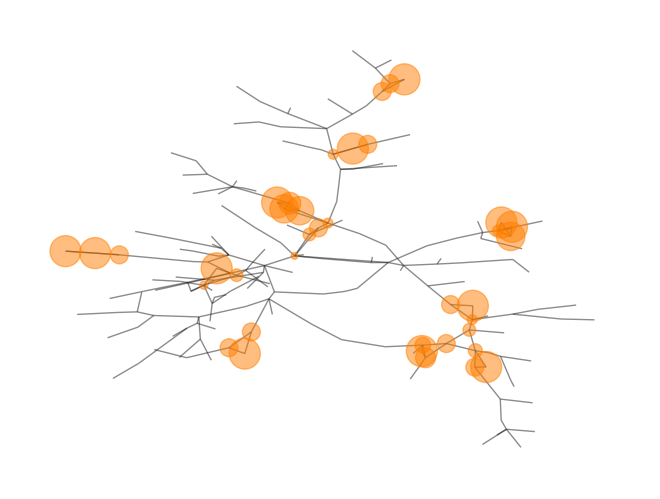

In [39]:
nx.draw(
    G = G_mobile_unlayered_undirected, 
    pos = nx.get_node_attributes(G=G_mobile_unlayered_undirected, name='pos'), 
    node_size = [500*k for k in nodelist_mobile['node_local_efficiency']], 
    node_color = '#ff7f00', 
    alpha = .5
)

### Brokerage
#### Effective size
Effective size $L(x)$ quantifies the **extent to which a node's neighbors are not connected among themselves**. It is also a purely local measure:

In [40]:
effective_size_mobile = nx.effective_size(G=G_mobile_unlayered_undirected)

#weighted_effective_size_mobile = nx.effective_size(G=G_mobile_unlayered_undirected, weight='weight')

In [41]:
nodelist_mobile['effective_size'] = effective_size_mobile.values()

#nodelist_mobile['weighted_effective_size'] = weighted_effective_size_mobile.values()

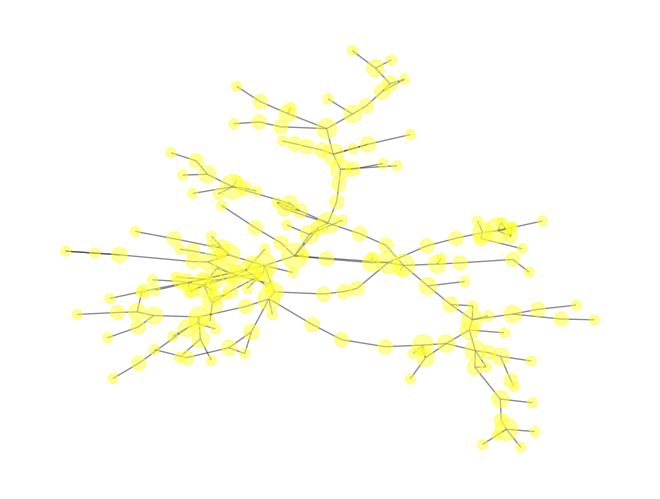

In [42]:
nx.draw(
    G = G_mobile_unlayered_undirected, 
    pos = nx.get_node_attributes(G=G_mobile_unlayered_undirected, name='pos'), 
    node_size = [50*k for k in nodelist_mobile['effective_size']], 
    node_color = '#ffff33', 
    alpha = .5
)

#### Constraint
Constraint $M(x)$ quantifies the **extent to which node x is invested in those neighbors that are themselves invested in the neighbors of x**. It uses the 2-hop environment of $x$:

In [43]:
constraint_mobile = nx.constraint(G=G_mobile_unlayered_undirected)

#weighted_constraint_mobile = nx.constraint(G=G_mobile_unlayered_undirected, weight='weight')

In [44]:
nodelist_mobile['constraint'] = constraint_mobile.values()

#nodelist_mobile['weighted_constraint'] = weighted_constraint_mobile.values()

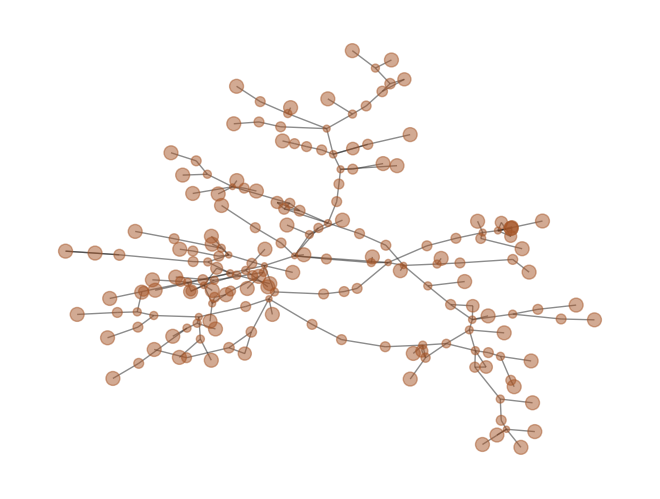

In [45]:
nx.draw(
    G = G_mobile_unlayered_undirected, 
    pos = nx.get_node_attributes(G=G_mobile_unlayered_undirected, name='pos'), 
    node_size = [100*k for k in nodelist_mobile['constraint']], 
    node_color = '#a65628', 
    alpha = .5
)

#### Node-level analysis
We have computed standard measures for brokerage and closure:

In [46]:
nodelist_mobile

degree  closeness  betweenness  clustering  node_local_efficiency  \
512  0.025907   0.142751     0.288986    0.000000               0.000000   
0    0.010363   0.127815     0.161485    0.000000               0.000000   
4    0.020725   0.108488     0.085636    0.333333               0.333333   
6    0.010363   0.116405     0.020617    0.000000               0.000000   
521  0.010363   0.134121     0.263925    0.000000               0.000000   
..        ...        ...          ...         ...                    ...   
486  0.005181   0.143388     0.000000    0.000000               0.000000   
491  0.015544   0.104212     0.050950    0.000000               0.000000   
492  0.020725   0.098419     0.060827    0.166667               0.166667   
503  0.020725   0.098269     0.051166    0.000000               0.000000   
505  0.005181   0.076375     0.000000    0.000000               0.000000   

     effective_size  constraint  
512             5.0    0.200000  
0               2.0    0.500000  
4               3.0    0.375312  
6               2.0    0.500000  
521             2.0    0.500000  
..              ...         ...  
486             1.0    1.000000  
491             3.0    0.333333  
492             3.5    0.350694  
503             4.0    0.250000  
505             1.0    1.000000  

[194 rows x 7 columns]

Knowing about the mathematical relationship of clustering coefficient and effective size, we want to see how our measures differ in practice. With pandas, we can easily get the correlation matrix:

In [47]:
nodelist_mobile.corr()

degree  closeness  betweenness  clustering  \
degree                 1.000000   0.408340     0.680428    0.143051   
closeness              0.408340   1.000000     0.569660   -0.026412   
betweenness            0.680428   0.569660     1.000000   -0.073177   
clustering             0.143051  -0.026412    -0.073177    1.000000   
node_local_efficiency  0.155842  -0.020100    -0.072226    0.996944   
effective_size         0.954274   0.412525     0.710183   -0.125794   
constraint            -0.839087  -0.413429    -0.588158    0.065928   

                       node_local_efficiency  effective_size  constraint  
degree                              0.155842        0.954274   -0.839087  
closeness                          -0.020100        0.412525   -0.413429  
betweenness                        -0.072226        0.710183   -0.588158  
clustering                          0.996944       -0.125794    0.065928  
node_local_efficiency               1.000000       -0.119200    0.060746  
effective_size                     -0.119200        1.000000   -0.870982  
constraint                          0.060746       -0.870982    1.000000

Correlations are only negative when the constraint measure is involved. Unlike all other brokerage metrics, it is not a measure of "opportunity". Since constraint is properly normalized, we can subtract it from 1 to arrive at such a more comparable brokerage measure:

In [48]:
nodelist_mobile['constraint'] = 1 - nodelist_mobile['constraint']

#nodelist_mobile['weighted_constraint'] = 1 - nodelist_mobile['weighted_constraint']

We want to insights about which metrics produce similar results. Therefore, we use multidimensional scaling (MDS) to embed our data into a two-dimensional space. The algorithm of the sklearn package needs as input a dissimilarity matrix. The standard way to precompute dissimilarities from correlations is to subtract the latter from 1:

In [49]:
data = (1 - nodelist_mobile.corr()).values

Now reduce dimensionality:

In [50]:
from sklearn.manifold import MDS

In [51]:
mds = MDS(n_components=2, random_state=42, dissimilarity='precomputed')
pos = mds.fit(data).embedding_

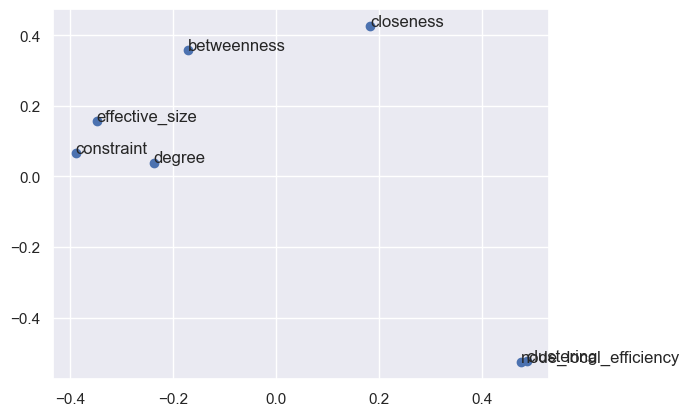

In [52]:
plt.scatter(pos[:, 0], pos[:, 1])
for i in range(0, len(nodelist_mobile.columns)):
    plt.text(pos[i, 0], pos[i, 1], nodelist_mobile.columns[i])

We see that clustering coefficient and its generalization, local efficiency, represent one group of metrics. From the literature we know that, in the limits of large data, these measures are inversely related to degree ([Ravasz & Barabási, 2003](https://doi.org/10.1103/PhysRevE.67.026112)). The other group consists of metrics that are more strongly correlated with degree (either positively or negatively, like constraint). Simmelian brokerage is strongly correlated with effective size. While the latter is mathematically related to the clustering coefficient, it is mathematically related to local efficiency. All these metrics are local ones. Constraint is constructed on a node's 2-hop environment. Due to this difference it is a viable alternative to quantifying brokerage opportunities. Betweenness is a global measure. The same is true for the global measure of betweenness centrality. Closeness, also a global measure, is somehow similar to all metrics and should not be used to measure brokerage or closure.

## 7.2. Meso-level analysis

McLevey (2022, chapter 14) on community detection

Menczer *et al.* (2020, chapter 6) on communities

Platt ch7

#### Community detection



In [53]:
from networkx.algorithms.community import girvan_newman

In [54]:
communities = girvan_newman(G=G_bt_unlayered)

In [55]:
#next(communities)

In [56]:
def get_partition(communities):
    return dict(sorted({node: community for community in range(len(communities)) for node in list(communities[community])}.items()))

In [57]:
#get_partition(next(communities))

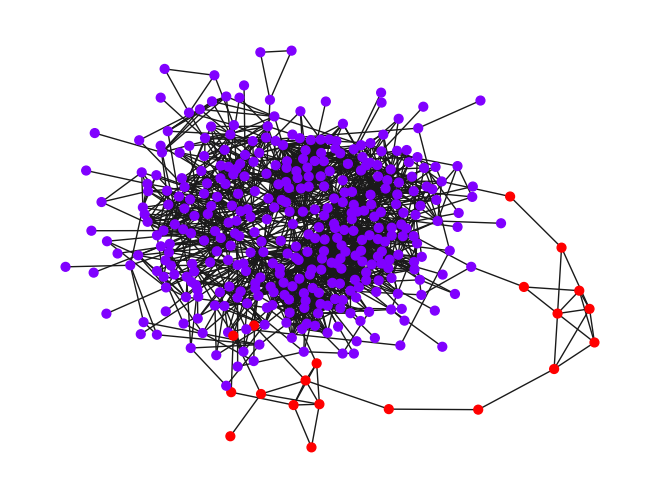

In [58]:
nx.draw(
    G = G_bt_unlayered, 
    pos = nx.get_node_attributes(G=G_bt_unlayered, name='pos'), 
    node_size = 40, 
    node_color = list(get_partition(next(communities)).values()), 
    cmap = plt.cm.rainbow
)

In [59]:
from networkx.algorithms.community import modularity

In [60]:
partition = get_partition(next(communities))

In [61]:
def get_communities(partition):
    return [{node for node, community in partition.items() if community == value} for value in set(partition.values())]

In [62]:
modularity(G=G_bt_unlayered, communities=get_communities(partition))

0.04934225270644087

In [63]:
def girvan_newman_communities(G, n_communities, weight=None):
    nodelist = pd.DataFrame(index=G.nodes())
    modularities = []
    if weight:
        def most_central_edge(G):
            centrality = nx.edge_betweenness_centrality(G=G, weight=weight)
            return max(centrality, key=centrality.get)
        communities = girvan_newman(G=G, most_valuable_edge=most_central_edge)
    else:
        communities = girvan_newman(G=G)
    for i in range(2, n_communities + 1):
        partition = get_partition(next(communities))
        nodelist[i] = partition.values()
        modularities.append(modularity(G=G, communities=get_communities(partition)))
    return nodelist, modularities

In [64]:
partitions, modularities = girvan_newman_communities(G=G_bt_unlayered, n_communities=20)

In [65]:
partitions

2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  \
0     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2     1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   
3     0   0   0   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   
5     0   0   0   2   2   2   2   2   2   2   3   3   3   3   3   3   3   3   
6     0   0   0   2   2   2   2   2   2   2   2   4   4   4   4   4   4   4   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
676   0   0   0   2   2   2   2   2   2   2   3   3   3   3   3   3   3   3   
677   0   0   0   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   
678   0   2   3   4   5   5   6   7   8   9  10  11  11  12  12  13  13  14   
680   0   2   3   4   5   5   6   7   8   9  10  11  11  12  12  13  13  14   
812   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

     20  
0     0  
2     1  
3     2  
5     3  
6     4  
..   ..  
676   3  
677   2  
678  15  
680  15  
812   0  

[384 rows x 19 columns]

In [66]:
modularities

[0.032422728766819356,
 0.04934225270644087,
 0.052330303172597584,
 0.10311155317259764,
 0.21818824811317533,
 0.21900279501912442,
 0.24141644184140434,
 0.2802465571853015,
 0.3635353790297795,
 0.532951263788334,
 0.6149841146011201,
 0.671148631198347,
 0.6709864155026978,
 0.6863905033382282,
 0.6860327216805546,
 0.6856138423348814,
 0.6854074708865515,
 0.6852583284953212,
 0.6848682637797964]

In [67]:
n_communities_optimal = modularities.index(max(modularities)) + 2
n_communities_optimal

15

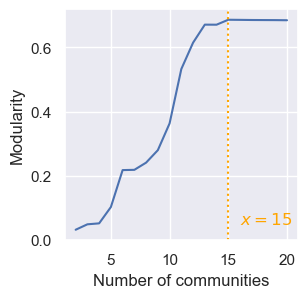

In [68]:
plt.figure(figsize=[3, 3])
plt.plot(partitions.columns, modularities)
plt.axvline(x=n_communities_optimal, color='orange', ls=':')
plt.text(x=n_communities_optimal+1, y=.05, s='$x=%.f$' %n_communities_optimal, color='orange')
plt.xlabel('Number of communities')
plt.ylabel('Modularity')
plt.show()

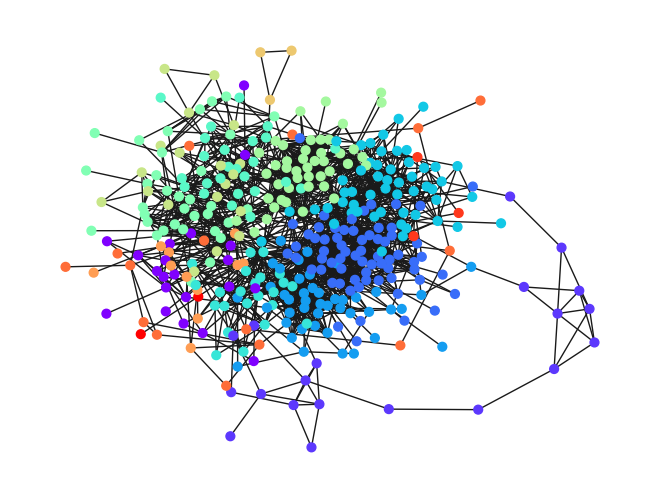

In [69]:
nx.draw(
    G = G_bt_unlayered, 
    pos = nx.get_node_attributes(G=G_bt_unlayered, name='pos'), 
    node_size = 40, 
    node_color = partitions[n_communities_optimal], 
    cmap = plt.cm.rainbow
)

In [70]:
partitions_weight, modularities_weight = girvan_newman_communities(G=G_bt_unlayered, n_communities=20, weight='strength')

In [71]:
n_communities_optimal_weight = modularities_weight.index(max(modularities_weight)) + 2
n_communities_optimal_weight

14

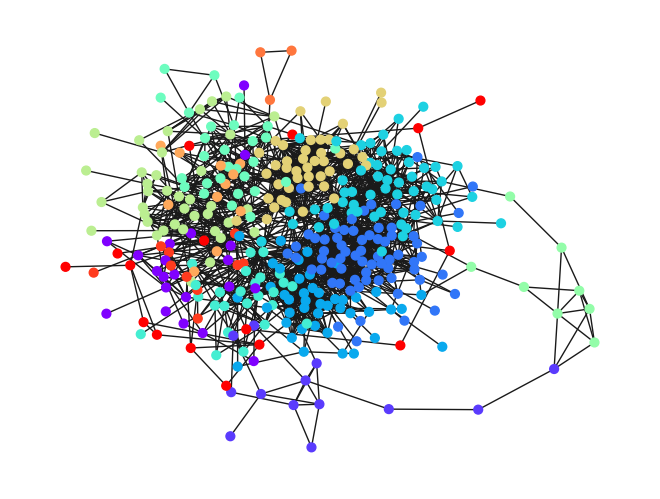

In [72]:
nx.draw(
    G = G_bt_unlayered, 
    pos = nx.get_node_attributes(G=G_bt_unlayered, name='pos'), 
    node_size = 40, 
    node_color = partitions_weight[n_communities_optimal_weight], 
    cmap = plt.cm.rainbow
)

#### Louvain

In [73]:
from networkx.algorithms.community import louvain_communities

In [74]:
louvain = louvain_communities(G=G_bt_unlayered, weight='weight', seed=42)

In [75]:
nodelist_bt['louvain'] = get_partition(louvain).values()
nodelist_bt

louvain
0          7
2          6
3          0
5          4
6          2
..       ...
676        4
677        0
678        5
680        5
812        7

[384 rows x 1 columns]

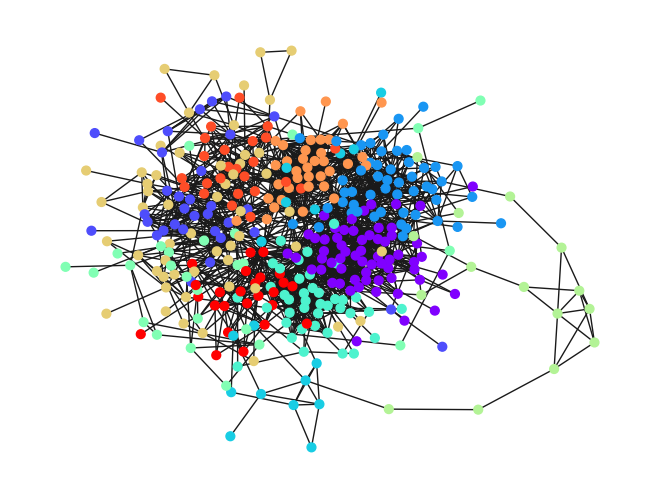

In [76]:
nx.draw(
    G = G_bt_unlayered, 
    pos = nx.get_node_attributes(G=G_bt_unlayered, name='pos'), 
    node_size = 40, 
    node_color = nodelist_bt['louvain'], 
    cmap = plt.cm.rainbow
)

#### Consensus clustering



In [77]:
import numpy as np

In [78]:
def louvain_consensus_communities(G, number_of_iterations=100, weight='weight', resolution=1., seed=42):
    a = np.empty([G.number_of_nodes(), number_of_iterations], dtype=object)
    number_of_communities = 0
    for i in range(number_of_iterations):
        a[:, i] = [community + number_of_communities for community in get_partition(louvain_communities(G=G, weight=weight, resolution=resolution, seed=i)).values()]
        number_of_communities = max(a[:, i]) + 1
    a = a.astype(str)
    
    B = nx.Graph()
    B.add_nodes_from(G)
    for i in range(number_of_iterations):
        B.add_edges_from(zip(G.nodes(), a[:, i]))
    G_consensus = nx.bipartite.overlap_weighted_projected_graph(B=B, nodes=G.nodes())
    
    return louvain_communities(G=G_consensus, weight='weight', seed=seed)

In [79]:
louvain_consensus = louvain_consensus_communities(G=G_bt_unlayered, number_of_iterations=10, resolution=1.)
nodelist_bt['louvain_consensus'] = get_partition(louvain_consensus).values()
nx.set_node_attributes(G=G_bt_unlayered, values=nodelist_bt['louvain_consensus'], name='louvain_consensus')
nx.set_node_attributes(G=G_bt, values=nodelist_bt['louvain_consensus'], name='louvain_consensus')

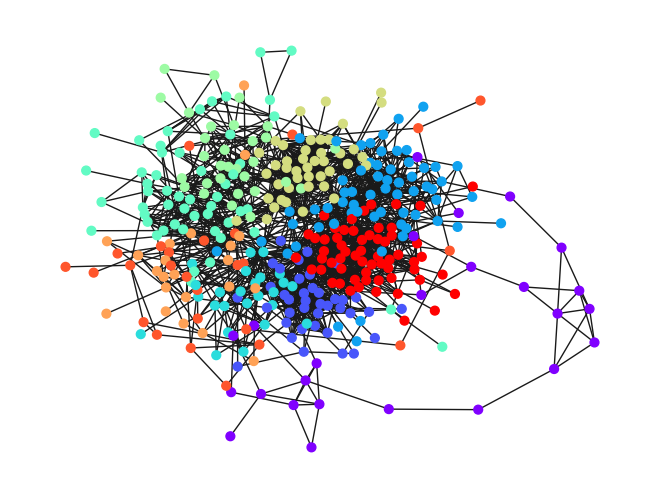

In [80]:
nx.draw(
    G = G_bt_unlayered, 
    pos = nx.get_node_attributes(G=G_bt_unlayered, name='pos'), 
    node_size = 40, 
    node_color = list(nx.get_node_attributes(G=G_bt_unlayered, name='louvain_consensus').values()), 
    cmap = plt.cm.rainbow
)

#### Weak ties

Display average edge weight within and between communities

#### Overlap of communities

In [81]:
def filter_edge(u, v, key):
    return G_bt.has_edge(u, v, key_filter)

def filter_node(v):
    return G_bt_layer.degree[v] > 0

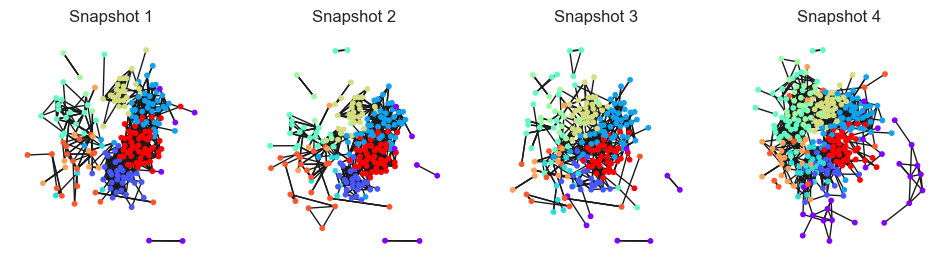

In [82]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for key_filter in range(4):
    axs[key_filter].set_title('Snapshot '+str(key_filter+1))
    G_bt_layer = nx.subgraph_view(G=G_bt, filter_edge=filter_edge)
    G_bt_layer_pruned = nx.subgraph_view(G=G_bt_layer, filter_node=filter_node)
    nx.draw(
        G = G_bt_layer_pruned, 
        ax = axs[key_filter], 
        pos = nx.get_node_attributes(G=G_bt, name='pos'), 
        node_size = 10, 
        node_color = list(nx.get_node_attributes(G=G_bt_layer_pruned, name='louvain_consensus').values()), 
        cmap = plt.cm.rainbow
    )

In [83]:
def louvain_overlap_communities(G, overlap=.5, number_of_iterations=None, weight='weight', resolution=1.):
    number_of_layers = max([key for (u, v, key) in G.edges.keys()]) + 1
    a = np.empty([G.number_of_nodes(), number_of_layers], dtype=object)
    number_of_communities = 0
    def filter_edge_layer(u, v, key):
        return G_bt.has_edge(u, v, key_filter)
    for key_filter in range(number_of_layers):
        G_layer = nx.subgraph_view(G=G, filter_edge=filter_edge_layer)
        if number_of_iterations:
            a[:, key_filter] = [community + number_of_communities for community in get_partition(louvain_consensus_communities(G=G_layer, number_of_iterations=number_of_iterations, weight=weight, resolution=resolution, seed=key_filter)).values()]
        else:
            a[:, key_filter] = [community + number_of_communities for community in get_partition(louvain_communities(G=G_layer, weight=weight, resolution=resolution, seed=key_filter)).values()]
        number_of_communities = max(a[:, key_filter]) + 1
    a = a.astype(str)
    
    B = nx.Graph()
    B.add_nodes_from(G)
    for key_filter in range(number_of_layers):
        B.add_edges_from(zip(G.nodes(), a[:, key_filter]))
    G_overlap = nx.bipartite.overlap_weighted_projected_graph(B=B, nodes=set(a.reshape(a.shape[0]*a.shape[1])))
    def filter_edge_overlap(u, v):
        if G_overlap[u][v]['weight'] > overlap:
            return G_overlap[u][v]['weight']
    G_overlap_filter = nx.subgraph_view(G=G_overlap, filter_edge=filter_edge_overlap)
    
    df = pd.DataFrame(a.astype(int), index=G.nodes())
    cc = nx.connected_components(G_overlap_filter)
    cc = [list(c) for c in cc]
    cc = [[int(i) for i in c] for c in cc]
    cc = [sorted(c) for c in cc]
    for i in range(len(cc)):
        size = len(cc[i])
        if size > 1:
            for j in range(1, size):
                df.replace(to_replace=cc[i][j], value=cc[i][0], inplace=True)
    
    mapping = pd.DataFrame(pd.concat([df[i] for i in range(df.shape[1])]).drop_duplicates(), columns=['community']).reset_index(drop=True)
    mapping = mapping.sort_values('community').reset_index(drop=True).reset_index().set_index('community')
    mapping = mapping.to_dict()['index']
    for column in df.columns:
        df[column] = df[column].map(mapping)
    
    return df

In [84]:
louvain_overlap = louvain_overlap_communities(G=G_bt, overlap=.5, number_of_iterations=10, resolution=.5)

In [85]:
louvain_overlap.loc[132, :]

0     45
1     45
2     45
3    340
Name: 132, dtype: int64

In [86]:
louvain_overlap.loc[497, :]

0     45
1     45
2     45
3    321
Name: 497, dtype: int64

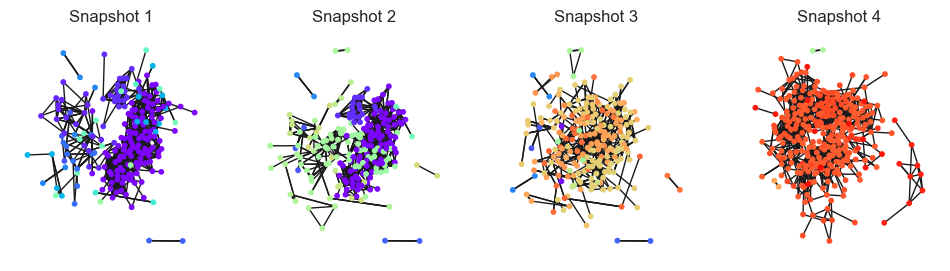

In [87]:
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for key_filter in range(4):
    axs[key_filter].set_title('Snapshot '+str(key_filter+1))
    nx.set_node_attributes(G=G_bt, values=louvain_overlap[key_filter], name=str(key_filter))
    G_bt_layer = nx.subgraph_view(G=G_bt, filter_edge=filter_edge)
    G_bt_layer_pruned = nx.subgraph_view(G=G_bt_layer, filter_node=filter_node)
    nx.draw(
        G = G_bt_layer_pruned, 
        ax = axs[key_filter], 
        pos = nx.get_node_attributes(G=G_bt, name='pos'), 
        node_size = 10, 
        node_color = list(nx.get_node_attributes(G=G_bt_layer_pruned, name=str(key_filter)).values()), 
        cmap = plt.cm.rainbow, 
        vmin = louvain_overlap.min().min(), 
        vmax = louvain_overlap.max().max()
    )

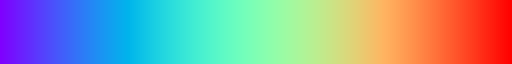

In [88]:
plt.cm.rainbow

#### Resolution limit

Underfitting problem (Peixoto 300)

BOX on Leiden, other algorithms, and SBM

#### Hashtags

In [89]:
#louvain_hashtags = louvain_communities(G=G_hashtag_cooccurrences_lcc, weight='weight', seed=42) # 2 min

In [90]:
#qg = nx.quotient_graph(G_hashtag_cooccurrences_lcc, louvain_hashtags, relabel=True) # 45 min

In [91]:
#nx.draw(
#    G = qg, 
#    pos = nx.kamada_kawai_layout(G=qg), 
#    node_size = [10*np.log(data['nnodes']) for v, data in qg.nodes(data=True)], 
#    width = [np.log(data['weight']) for u, v, data in qg.edges(data=True)], 
#    alpha = .25
#)

## 7.3. Macro-level analysis

McLevey (2022, chapter 14) on k-cliques, k-cores, components

McLevey (2022, chapter 15) on degree inequality

Ma & Seth (2020, 55–70) on cliques and components

Ma & Seth (2020, 31–42) on hubs

Menczer *et al.* (2020, chapter 2) on the Small World and (chapter 3) on hubs

centralization, average clustering coefficient, average local efficiency, global efficiency

Small World

Strength of weak ties

Scale-freeness and Matthew Effect

### 7.3.1. Distance and ... (Small-World networks)

Platt ch6

In [92]:
# number of nodes
n_fb = G_fb.number_of_nodes()
n_mobile = G_mobile_unlayered_undirected.number_of_nodes()
n_bt = G_bt_unlayered.number_of_nodes()

In [93]:
# number of edges
m_fb = G_fb.number_of_edges()
m_mobile = G_mobile_unlayered_undirected.number_of_edges()
m_bt = G_bt_unlayered.number_of_edges()

In [94]:
# density
p_fb = nx.density(G=G_fb)
p_mobile = nx.density(G=G_mobile_unlayered_undirected)
p_bt = nx.density(G=G_bt_unlayered)

In [95]:
# average clustering coefficient
c_fb = nx.average_clustering(G=G_fb)
c_mobile = nx.average_clustering(G=G_mobile_unlayered_undirected)
c_bt = nx.average_clustering(G=G_bt_unlayered)

In [96]:
# average shortest path length
l_fb = nx.average_shortest_path_length(G=G_fb)
l_mobile = nx.average_shortest_path_length(G=G_mobile_unlayered_undirected)
l_bt = nx.average_shortest_path_length(G=G_bt_unlayered)

In [97]:
stats = pd.DataFrame(index=['Facebook friendship', 'Text messages & phone calls', 'Face-to-face interaction'])
stats['n'] = [n_fb, n_mobile, n_bt]
stats['m'] = [m_fb, m_mobile, m_bt]
stats['p'] = [p_fb, p_mobile, p_bt]
stats['c'] = [c_fb, c_mobile, c_bt]
stats['l'] = [l_fb, l_mobile, l_bt]
stats[['p', 'c', 'l']] = stats[['p', 'c', 'l']].round(2)
stats

n     m     p     c     l
Facebook friendship          800  6418  0.02  0.32  2.98
Text messages & phone calls  194   215  0.01  0.10  9.99
Face-to-face interaction     384  1936  0.03  0.40  3.66

In [98]:
G_fb_random = nx.erdos_renyi_graph(n=n_fb, p=p_fb, seed=42)
G_mobile_random = nx.erdos_renyi_graph(n=n_mobile, p=p_mobile, seed=42)
G_bt_random = nx.erdos_renyi_graph(n=n_bt, p=p_bt, seed=42)

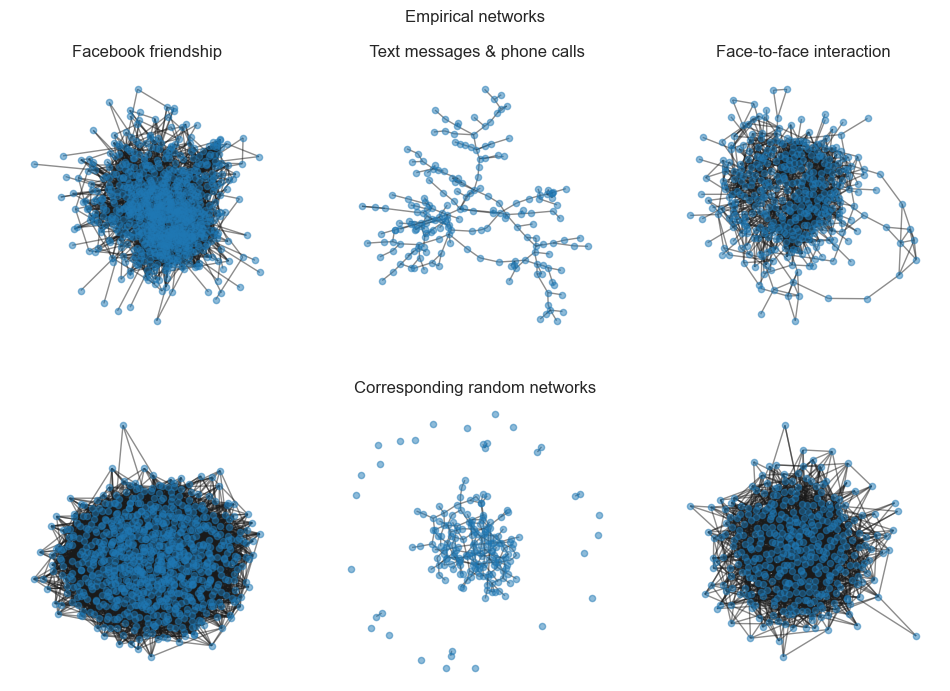

In [99]:
empirical = [G_fb, G_mobile_unlayered_undirected, G_bt_unlayered]
titles_empirical = ['Facebook friendship', 'Empirical networks\n\n Text messages & phone calls', 'Face-to-face interaction']
random = [G_fb_random, G_mobile_random, G_bt_random]
titles_random = ['', 'Corresponding random networks', '']

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i in range(3):
    axs[0, i].set_title(titles_empirical[i])
    nx.draw(
        G = empirical[i], 
        pos = nx.get_node_attributes(G=empirical[i], name='pos'), 
        ax = axs[0, i], 
        node_size = 20, 
        alpha = .5
    )
for i in range(3):
    axs[1, i].set_title(titles_random[i])
    nx.draw(
        G = random[i], 
        ax = axs[1, i], 
        node_size = 20, 
        alpha = .5
    )

In [100]:
number_of_iterations = 10

average_clustering_random = []
average_shortest_path_length_random = []
for i in range(number_of_iterations):
    print(i)
    G_fb_random = nx.erdos_renyi_graph(n=n_fb, p=p_fb, seed=i)
    average_clustering_random.append(nx.average_clustering(G=G_fb_random))
    average_shortest_path_length_random.append(nx.average_shortest_path_length(G=G_fb_random))

0
1
2
3
4
5
6
7
8
9


In [101]:
np.mean(average_clustering_random)

0.020218045953770632

In [102]:
np.mean(average_shortest_path_length_random)

2.705002816020025

In [103]:
(np.log(n_fb) - .57722) / np.log(2 * m_fb / n_fb) + .5

2.700546849146907

In [104]:
l_fb_random = (np.log(n_fb) - .57722) / np.log(2 * m_fb / n_fb) + .5
l_mobile_random = (np.log(n_mobile) - .57722) / np.log(2 * m_mobile / n_mobile) + .5
l_bt_random = (np.log(n_bt) - .57722) / np.log(2 * m_bt / n_bt) + .5

In [105]:
stats['l_random'] = [l_fb_random, l_mobile_random, l_bt_random]
stats['c_norm'] = stats['c'] / stats['p']
stats['l_norm'] = stats['l'] / stats['l_random']
stats['q'] = stats['c_norm'] / stats['l_norm']
stats[['l_random', 'c_norm', 'l_norm', 'q']] = stats[['l_random', 'c_norm', 'l_norm', 'q']].round(2)

In [106]:
stats

n     m     p     c     l  l_random  c_norm  \
Facebook friendship          800  6418  0.02  0.32  2.98      2.70   16.00   
Text messages & phone calls  194   215  0.01  0.10  9.99      6.39   10.00   
Face-to-face interaction     384  1936  0.03  0.40  3.66      2.83   13.33   

                             l_norm      q  
Facebook friendship            1.10  14.50  
Text messages & phone calls    1.56   6.40  
Face-to-face interaction       1.30  10.29

#### Triadic closure: friendship

Probability to be friends as a function of number of friends that are friends

#### Watts-Strogatz model

In [107]:
nodelist_fb['degree'] = [k for v, k in G_fb.degree()]

In [108]:
degree_ring = 0
k = 2
while np.mean(degree_ring) < np.mean(nodelist_fb['degree']):
    G_ring = nx.watts_strogatz_graph(n=G_fb.number_of_nodes(), k=k, p=0.)
    degree_ring = [k for v, k in G_ring.degree()]
    k += 1
print('Each node is joined with its %.f nearest neighbors in a ring topology.' %k)

Each node is joined with its 19 nearest neighbors in a ring topology.


In [109]:
nx.density(G=G_fb)

0.020081351689612014

In [110]:
nx.density(G=G_ring)

0.02252816020025031

In [111]:
c_fb

0.3153509697401216

In [112]:
np.mean(list(nx.clustering(G=G_ring).values()))

0.7058823529411765

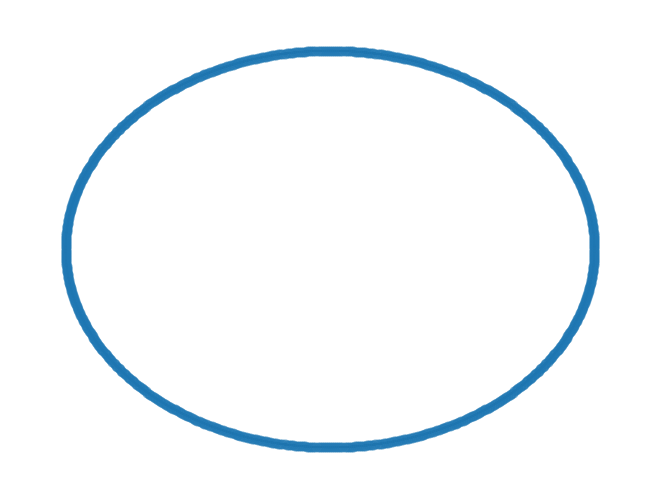

In [113]:
nx.draw(
    G = G_ring, 
    pos = nx.circular_layout(G=G_ring), 
    node_size = 40, 
    alpha = .5
)

In [114]:
l_ws = 800
p = 0.
while l_ws > l_fb:
    G_ws = nx.watts_strogatz_graph(n=G_fb.number_of_nodes(), k=19, p=p)
    l_ws = nx.average_shortest_path_length(G=G_ws)
    p += .01
print('The probability of rewiring each edge is %.2f.' %p)

The probability of rewiring each edge is 0.19.


In [115]:
nx.average_clustering(G_ws)

0.3934328479089975

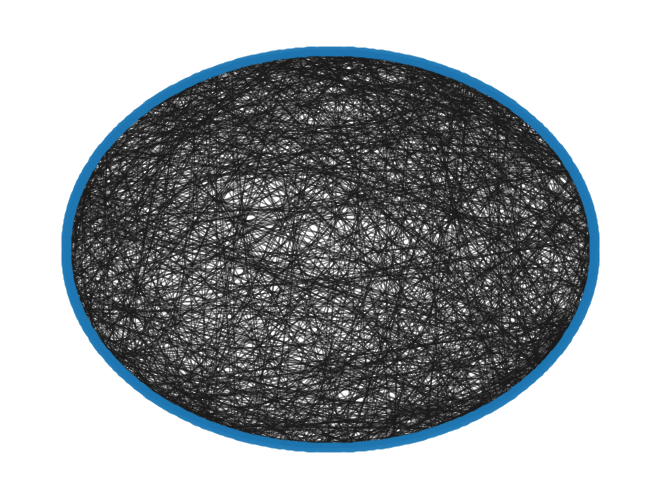

In [116]:
nx.draw(
    G = G_ws, 
    pos = nx.circular_layout(G=G_ws), 
    node_size = 40, 
    alpha = .5
)

In [117]:
#nx.draw(
#    G = G_ws, 
#    node_size = 40, 
#    alpha = .5
#)

### Hashtags

In [118]:
hashtags = pd.read_csv('../data/TweetsCOV19/TweetsCOV19_tables/hashtags.tsv.gz', sep='\t', index_col=None, encoding='utf-8')
hashtag_cooccurrences = pd.read_csv('../data/TweetsCOV19/hashtag_cooccurrences.tsv.gz', sep='\t', index_col=None, encoding='utf-8')

In [119]:
hashtags['tweets_norm'] = hashtag_cooccurrences[hashtag_cooccurrences['hashtag_idx_i'] == hashtag_cooccurrences['hashtag_idx_j']].reset_index(drop=True)['cooccurrence_norm']
hashtag_cooccurrences = hashtag_cooccurrences[hashtag_cooccurrences['hashtag_idx_i'] != hashtag_cooccurrences['hashtag_idx_j']].reset_index(drop=True)

In [120]:
G_hashtag_cooccurrences = nx.from_pandas_edgelist(
    df = hashtag_cooccurrences, 
    source = 'hashtag_idx_i', 
    target = 'hashtag_idx_j', 
    #edge_attr = ['cooccurrence', 'cooccurrence_norm'], 
    create_using = nx.Graph
)

In [121]:
G_hashtag_cooccurrences_lcc = G_hashtag_cooccurrences.subgraph(sorted(nx.connected_components(G_hashtag_cooccurrences), key=len, reverse=True)[0])

In [122]:
# add figure of network drawn in graph-tool

In [123]:
n_hashtags = G_hashtag_cooccurrences_lcc.number_of_nodes()
m_hashtags = G_hashtag_cooccurrences_lcc.number_of_edges()
p_hashtags = nx.density(G=G_hashtag_cooccurrences_lcc)
c_hashtags = 0.75261451
l_hashtags = 3.27701117
l_hashtags_random = (np.log(n_hashtags) - .57722) / np.log(2 * m_hashtags / n_hashtags) + .5
c_hashtags_norm = c_hashtags / p_hashtags
l_hashtags_norm = l_hashtags / l_hashtags_random
q_hashtags = c_hashtags_norm / l_hashtags_norm

In [124]:
stats.loc['Hashtag co-occurrences'] = [
    n_hashtags, 
    m_hashtags, 
    p_hashtags, 
    c_hashtags, 
    l_hashtags, 
    l_hashtags_random, 
    c_hashtags_norm, 
    l_hashtags_norm, 
    q_hashtags
]
stats[['n', 'm']] = stats[['n', 'm']].astype(int)
stats[['p']] = stats[['p']].round(5)
stats[['c', 'l', 'l_random', 'c_norm', 'l_norm', 'q']] = stats[['c', 'l', 'l_random', 'c_norm', 'l_norm', 'q']].round(2)

In [125]:
stats

n        m        p     c     l  l_random  \
Facebook friendship             800     6418  0.02000  0.32  2.98      2.70   
Text messages & phone calls     194      215  0.01000  0.10  9.99      6.39   
Face-to-face interaction        384     1936  0.03000  0.40  3.66      2.83   
Hashtag co-occurrences       226436  1864812  0.00007  0.75  3.28      4.70   

                               c_norm  l_norm         q  
Facebook friendship             16.00    1.10     14.50  
Text messages & phone calls     10.00    1.56      6.40  
Face-to-face interaction        13.33    1.30     10.29  
Hashtag co-occurrences       10346.57    0.70  14823.94

In [126]:
#c_hashtags = nx.average_clustering(G=G_hashtag_cooccurrences_lcc) # takes about 1 hour

In [127]:
#l_hashtags = nx.average_shortest_path_length(G=G_hashtag_cooccurrences_lcc) # takes very long

BOX

NX
...

GT
10sec (computing c)
13min (computing l)
36min (processing l property map)

### 7.3.2. Inequality and hierarchy (scale-free networks)

CNS FB and hashtag study

In [128]:
import powerlaw

In [129]:
fit_degree_fb = powerlaw.Fit(data=nodelist_fb['degree'], xmin=1)

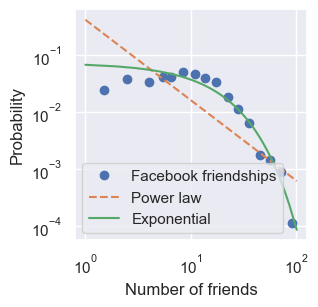

In [130]:
plt.figure(figsize=[3, 3])
fig = fit_degree_fb.plot_pdf(marker='o', linestyle='', label='Facebook friendships')
fit_degree_fb.power_law.plot_pdf(linestyle='--', label='Power law')
fit_degree_fb.exponential.plot_pdf(linestyle='-', label='Exponential')
plt.legend()
plt.xlabel('Number of friends')
plt.ylabel('Probability')
plt.show()

In [131]:
from scipy.stats import entropy

In [132]:
# centralization
# Platt 85
1 - entropy(pk=nodelist_fb['degree']) / np.log(len(nodelist_fb['degree']))

0.04286716024454429

#### Degree correlation

In [133]:
nx.degree_pearson_correlation_coefficient(G=G_fb)

0.18241178995485918

#### Hierarchical modularity

In [134]:
nodelist_fb['log_degree'] = np.log10(nodelist_fb['degree'])
nodelist_fb['clustering'] = list(nx.clustering(G=G_fb).values())
nodelist_fb['log_clustering'] = np.log10(nodelist_fb['clustering'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


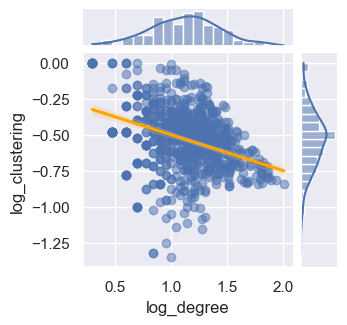

In [135]:
plot = sns.jointplot(
    data = nodelist_fb[nodelist_fb['clustering'] > 0], 
    x = 'log_degree', 
    y = 'log_clustering', 
    kind = 'reg', 
    joint_kws={'scatter_kws':{'alpha': .5}, 'line_kws':{'color': 'orange'}}
)
plot.fig.set_figwidth(3)
plot.fig.set_figheight(3)

#### Flow hierarchy

In [136]:
nx.flow_hierarchy(G=G_mobile_unlayered)

0.13008130081300817

#### Barabási-Albert model

In [137]:
p_ba = 0
m = 1
while p_ba < p_fb:
    G_ba = nx.barabasi_albert_graph(n=G_fb.number_of_nodes(), m=m)
    p_ba = nx.density(G=G_ba)
    m += 1

In [138]:
nx.density(G=G_fb)

0.020081351689612014

In [139]:
nx.density(G=G_ba)

0.0222747183979975

In [140]:
nodelist_fb['degree'].mean()

16.045

In [141]:
degree_ba = [k for v, k in G_ba.degree()]

In [142]:
np.mean(degree_ba)

17.7975

In [143]:
fit_degree_ba = powerlaw.Fit(data=degree_ba, xmin=1)

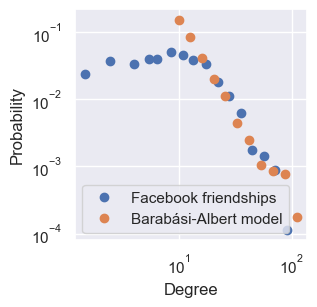

In [144]:
plt.figure(figsize=[3, 3])
fig = fit_degree_fb.plot_pdf(marker='o', linestyle='', label='Facebook friendships')
fit_degree_ba.plot_pdf(marker='o', linestyle='', label='Barabási-Albert model')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.show()

In [145]:
#nx.draw(
#    G = G_ba, 
#    node_size = degree_ba, 
#    alpha = .5
#)

### Hashtags

In [146]:
fit_tweets_norm = powerlaw.Fit(data=hashtags['tweets_norm'], xmin=2)

In [147]:
fit_tweets_norm.alpha

2.005606918415123

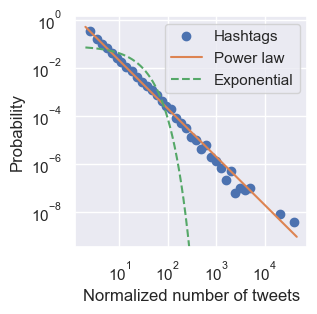

In [148]:
plt.figure(figsize=[3, 3])
fig = fit_tweets_norm.plot_pdf(marker='o', linestyle='', label='Hashtags')
fit_tweets_norm.power_law.plot_pdf(linestyle='-', label='Power law')
fit_tweets_norm.exponential.plot_pdf(linestyle='--', label='Exponential')
plt.ylim(3.29e-10, 1.38)
plt.legend()
plt.xlabel('Normalized number of tweets')
plt.ylabel('Probability')
plt.show()

In [149]:
#centralization
1 - entropy(pk=hashtags['tweets_norm']) / np.log(len(hashtags['tweets_norm']))

0.261849428075824

In [150]:
#nx.degree_pearson_correlation_coefficient(G=G_hashtag_cooccurrences_lcc) # takes long -- how long?

### 7.3.3. Cohesion

CNS FB and hashtag study

The lecture prepared the ground for cohesion analysis as the analytical process of modeling network cores. Quite generally, social networks with agents as nodes tend to weakly weighted and sparse, cultural networks with facts as nodes tend to be strongly weighted and dense. As a result, two kinds of cohesion analysis are required: graph theoretical methods and simple edge filtering. These are the two sections in this notebook.

#### Graph theoretical core detection
These methods have in common that cohesion is analyzed by taking the **structure of relations** into account. We will again be working with the elite families dataset:

#### Connected Components
Connected components are **maximal subgraphs** of undirected Graphs in which all node pairs are connected by **paths**:

Alternatively, highlight the largest connected component in the whole graph:

#### Cutpoints
A cutpoint is a node whose removal will increase the number of connected components. The method is not implemented for DiGraphs:

In [151]:
nx.articulation_points(G=G_fb)

<generator object articulation_points at 0x000002180B9D7970>

In [152]:
nodes_cut = [v for v in sorted(nx.articulation_points(G=G_bt_unlayered))]

In [153]:
def highlights(G, nodes):
    d = dict(zip(G.nodes, G.number_of_nodes() * ['white']))
    for node in nodes:
        d.update({node: 'red'})
    return d

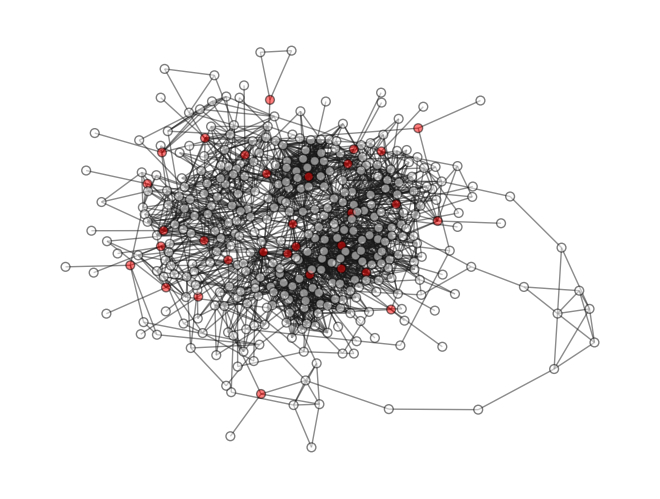

In [154]:
nx.draw(
    G = G_bt_unlayered, 
    pos = nx.get_node_attributes(G=G_bt_unlayered, name='pos'), 
    node_size = 40, 
    node_color = list(highlights(G=G_bt_unlayered, nodes=nodes_cut).values()), 
    alpha = .5, 
    edgecolors = 'black'
)

Attack on scale-free network (Platt 82-3)

#### Minimum cuts

Platt 83

In [155]:
nx.algorithms.connectivity.minimum_st_node_cut(G=G_bt_unlayered, s=0, t=2)

{132, 354, 554}

#### Connectivity

Platt 84-5

In [156]:
nx.node_connectivity(G=G_bt_unlayered)

1

In [157]:
#nx.average_node_connectivity(G=G_bt_unlayered) # takes long -- how long?

#### Bicomponents
Biconnected components or bicomponents are maximal subgraphs that cannot be disconnected by the removal of any single node. The method is not implemented for DiGraphs:

In [158]:
nx.biconnected_components(G=G_bt_unlayered)

<generator object biconnected_components at 0x000002180E0B7270>

In [159]:
sets_nodes_bicomp = [c for c in sorted(nx.biconnected_components(G=G_bt_unlayered), key=len, reverse=True)]

Largest bicomponent:

In [160]:
nodes_lbicomp = max(nx.biconnected_components(G=G_bt_unlayered), key=len) # or:
nodes_lbicomp = sets_nodes_bicomp[0]

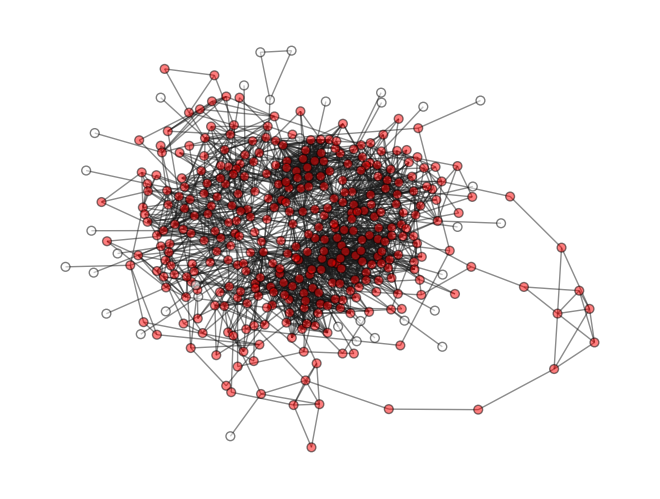

In [161]:
nx.draw(
    G = G_bt_unlayered, 
    pos = nx.get_node_attributes(G=G_bt_unlayered, name='pos'), 
    node_size = 40, 
    node_color = list(highlights(G=G_bt_unlayered, nodes=nodes_lbicomp).values()), 
    alpha = .5, 
    edgecolors = 'black'
)

#### k-cores
$k$-cores are maximal subgraphs that contain nodes of degree $k$ or more. networkx has the `k_core()` method to directly extract $k$-cores as subgraphs:

In [162]:
#G_unlayered_undirected = nx.Graph({0: [1, 2], 1: [2], 3: [4, 6], 4: [5], 5: [6]})

In [163]:
k = 5

G_bt_unlayered_kcores = nx.k_core(G=G_bt_unlayered, k=k)

Note, however, that `k_core()` extracts all $k$-cores. To just extract a particular $k$-core, e.g., the largest:

In [164]:
sets_nodes_kcores = [c for c in sorted(nx.connected_components(G=G_bt_unlayered_kcores), key=len, reverse=True)]

In [165]:
nodes_lkcore = max(nx.connected_components(G=G_bt_unlayered_kcores), key=len) # or:
nodes_lkcore = sets_nodes_kcores[0]

In [166]:
G_bt_unlayered_lkcore = G_bt_unlayered_kcores.subgraph(nodes_lkcore).copy()

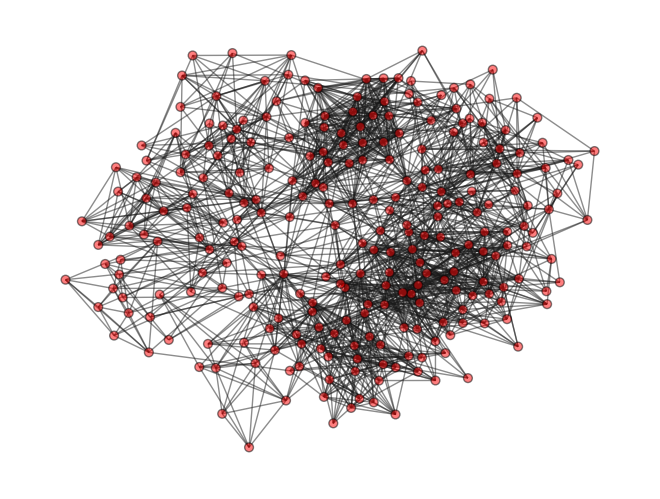

In [167]:
nx.draw(
    G = G_bt_unlayered_lkcore, 
    pos = nx.get_node_attributes(G=G_bt_unlayered_lkcore, name='pos'), 
    node_size = 40, 
    node_color = list(highlights(G=G_bt_unlayered_lkcore, nodes=nodes_lkcore).values()), 
    alpha = .5, 
    edgecolors = 'black'
)

Alternatively, highlight all $k$-cores ...

In [168]:
nx.core_number(G=G_bt_unlayered).values()

dict_values([6, 3, 9, 9, 9, 6, 7, 4, 7, 9, 3, 9, 7, 5, 9, 4, 8, 1, 2, 9, 9, 3, 1, 3, 8, 4, 8, 9, 5, 9, 6, 12, 1, 9, 2, 9, 7, 6, 11, 1, 7, 4, 2, 1, 5, 4, 9, 7, 3, 9, 9, 9, 4, 3, 12, 1, 3, 4, 8, 6, 5, 7, 6, 8, 3, 5, 3, 7, 7, 9, 1, 2, 12, 9, 1, 7, 9, 1, 8, 7, 9, 5, 9, 1, 6, 12, 12, 7, 7, 9, 8, 3, 1, 9, 5, 5, 7, 3, 9, 8, 8, 9, 12, 4, 9, 9, 2, 6, 2, 5, 2, 2, 12, 12, 9, 12, 9, 12, 2, 9, 6, 5, 6, 1, 7, 6, 5, 3, 7, 9, 1, 8, 5, 6, 6, 8, 9, 12, 6, 9, 5, 6, 8, 7, 2, 6, 2, 9, 6, 1, 9, 7, 7, 10, 9, 4, 9, 9, 9, 5, 3, 5, 8, 3, 1, 9, 3, 6, 8, 5, 12, 9, 2, 2, 1, 9, 9, 8, 1, 12, 7, 4, 4, 3, 9, 8, 9, 7, 3, 9, 9, 2, 12, 2, 9, 2, 12, 5, 9, 2, 12, 2, 9, 9, 9, 7, 2, 4, 9, 2, 7, 1, 5, 6, 9, 9, 3, 1, 9, 2, 9, 3, 9, 12, 4, 5, 9, 6, 8, 3, 9, 9, 6, 6, 9, 8, 6, 9, 9, 9, 12, 4, 1, 7, 7, 8, 4, 3, 7, 8, 1, 9, 7, 1, 6, 3, 6, 6, 9, 3, 2, 3, 2, 1, 8, 5, 4, 6, 7, 5, 9, 9, 9, 9, 4, 2, 9, 9, 3, 5, 6, 12, 3, 7, 6, 6, 9, 9, 4, 6, 8, 2, 2, 1, 9, 4, 9, 12, 12, 12, 6, 4, 6, 8, 8, 6, 10, 3, 3, 1, 2, 5, 3, 2, 6, 1, 9, 4, 8, 6, 7,

In [169]:
nodes_kcores = {identifier for identifier, core_number in nx.core_number(G=G_bt_unlayered).items() if core_number >= k}

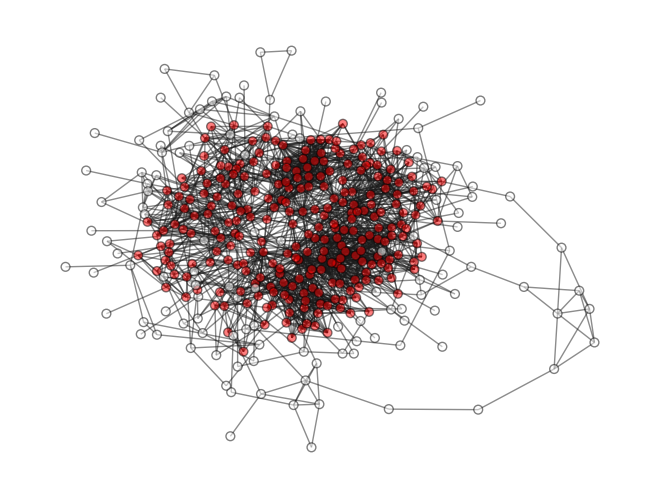

In [170]:
nx.draw(
    G = G_bt_unlayered, 
    pos = nx.get_node_attributes(G=G_bt_unlayered, name='pos'), 
    node_size = 40, 
    node_color = list(highlights(G=G_bt_unlayered, nodes=nodes_kcores).values()), 
    alpha = .5, 
    edgecolors = 'black'
)

... or highlight just the largest $k$-core:

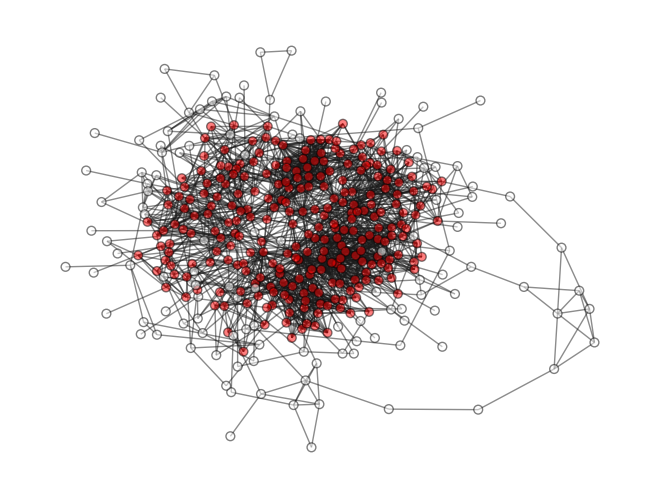

In [171]:
nx.draw(
    G = G_bt_unlayered, 
    pos = nx.get_node_attributes(G=G_bt_unlayered, name='pos'), 
    node_size = 40, 
    node_color = list(highlights(G=G_bt_unlayered, nodes=nodes_lkcore).values()), 
    alpha = .5, 
    edgecolors = 'black'
)

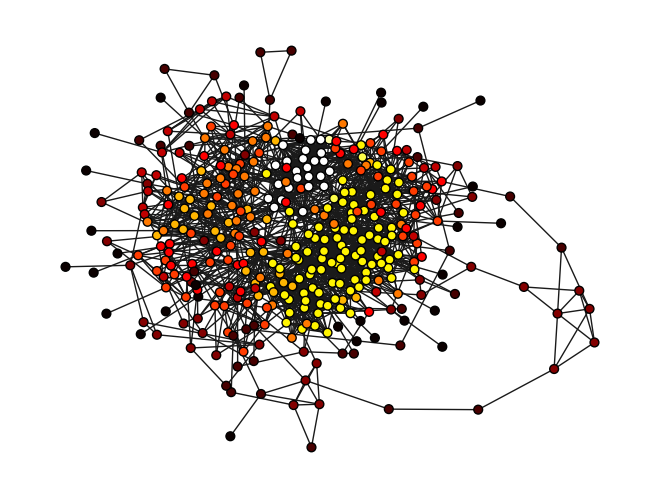

In [172]:
nx.draw(
    G = G_bt_unlayered, 
    pos = nx.get_node_attributes(G=G_bt_unlayered, name='pos'), 
    node_size = 40, 
    node_color = list(nx.core_number(G=G_bt_unlayered).values()), 
    #alpha = .5, 
    edgecolors = 'black', 
    cmap = plt.cm.hot
)

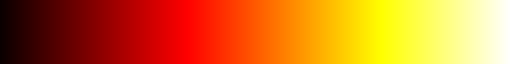

In [173]:
plt.cm.hot

For DiGraphs, the node degree is defined to be the in-degree + out-degree. For example, to highlight the largest directed $k$-core:

In [174]:
k = 10

# ...

#### k-components
$k$-components are maximal subgraphs that cannot be disconnected by the removal of by the removal of any $k$ nodes. Bicomponents are the special case for $k=2$. The method may identify multiple overlapping $k$-components with similar connectivity $k$. It is not implemented for DiGraphs:

In [175]:
nx.k_components(G=G_mobile_unlayered_undirected)

{3: [{267, 269, 403, 543}],
 2: [{194, 472, 537},
  {152, 405, 688},
  {267, 268, 269, 403, 543},
  {52, 221, 324},
  {39, 257, 331, 707},
  {12, 13, 492},
  {179, 656, 812},
  {190, 342, 372, 401},
  {4,
   36,
   37,
   55,
   69,
   97,
   100,
   108,
   141,
   146,
   151,
   176,
   177,
   221,
   235,
   266,
   268,
   300,
   344,
   371,
   401,
   424,
   512,
   578,
   611,
   645,
   743,
   785,
   798},
  {133, 237, 299}],
 1: [{0,
   4,
   6,
   12,
   13,
   23,
   27,
   36,
   37,
   39,
   42,
   51,
   52,
   55,
   58,
   61,
   64,
   69,
   70,
   75,
   80,
   81,
   88,
   90,
   91,
   96,
   97,
   100,
   104,
   108,
   109,
   118,
   121,
   128,
   129,
   131,
   133,
   136,
   137,
   139,
   141,
   144,
   145,
   146,
   147,
   149,
   151,
   152,
   154,
   157,
   158,
   165,
   166,
   169,
   173,
   176,
   177,
   179,
   183,
   187,
   190,
   193,
   194,
   204,
   207,
   208,
   211,
   218,
   221,
   228,
   229,
   234,
   235

In [176]:
k = 3

sets_nodes_kcomp = [c for c in sorted(nx.k_components(G=G_mobile_unlayered_undirected)[k], key=len, reverse=True)]
sets_nodes_kcomp

[{267, 269, 403, 543}]

Largest k-component:

In [177]:
nodes_lkcomp = sets_nodes_kcomp[0]

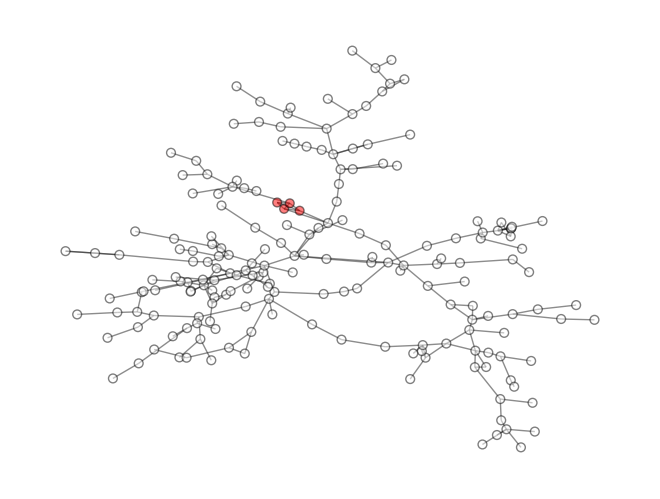

In [178]:
nx.draw(
    G = G_mobile_unlayered_undirected, 
    pos = nx.get_node_attributes(G=G_mobile_unlayered_undirected, name='pos'), 
    node_size = 40, 
    node_color = list(highlights(G=G_mobile_unlayered_undirected, nodes=nodes_lkcomp).values()), 
    alpha = .5, 
    edgecolors = 'black'
)

#### Attribute assortativity

Homophily analysis as cohesion

Size-corrected measure from Fariba?

The sex categories are 0: male; 1: female; 2: unknown.

In [179]:
nx.attribute_assortativity_coefficient(G=G_fb, attribute='sex')

0.10500672990329468

In [180]:
nx.attribute_mixing_matrix(G=G_fb, attribute='sex', normalized=False)

array([[6370., 2095.,  375.],
       [2095., 1148.,  138.],
       [ 375.,  138.,  102.]])

In [181]:
from collections import Counter

In [182]:
def attribute_density_matrix(G, attribute):
    l = [data[attribute] for v, data in G.nodes(data=True)]
    counts = list(Counter(l).values())
    a = np.empty(shape=(len(counts), len(counts)))
    for i in range(len(counts)):
        for j in range(len(counts)):
            if i == j:
                a[i, j] = counts[i] * (counts[j] - 1)
            else:
                a[i, j] = counts[i] * counts[j]
    return nx.attribute_mixing_matrix(G=G, attribute=attribute, normalized=False) / a

In [183]:
p_fb_sex = attribute_density_matrix(G=G_fb, attribute='sex').round(4)
p_fb_sex

array([[0.0189, 0.0217, 0.0122],
       [0.0217, 0.0419, 0.0157],
       [0.0122, 0.0157, 0.037 ]])

In [184]:
p_sbm = np.array([
    [0.05, 0.01, 0.01],
    [0.01, 0.05, 0.01],
    [0.01, 0.01, 0.05]
])

In [185]:
(p_fb_sex / p_fb).round(2)

array([[0.94, 1.08, 0.61],
       [1.08, 2.09, 0.78],
       [0.61, 0.78, 1.84]])

#### Stochastic Blockmodel

In [186]:
sizes_sbm = list(Counter([data['sex'] for v, data in G_fb.nodes(data=True)]).values())
sizes_sbm

[581, 166, 53]

In [187]:
node_attr_sbm = list(np.repeat(range(len(sizes_sbm)), sizes_sbm))

In [188]:
G_sbm = nx.stochastic_block_model(sizes=sizes_sbm, p=p_fb_sex, seed=42)

To avoid that red nodes are always on top of blue nodes:

In [189]:
new_labels = list(range(G_sbm.number_of_nodes()))
old_labels = new_labels.copy()
np.random.shuffle(new_labels)
mapping = dict(zip(old_labels, new_labels))

G_sbm = nx.relabel_nodes(G_sbm, mapping)
node_attr_sbm = [x for _, x in sorted(zip(new_labels, node_attr_sbm))]

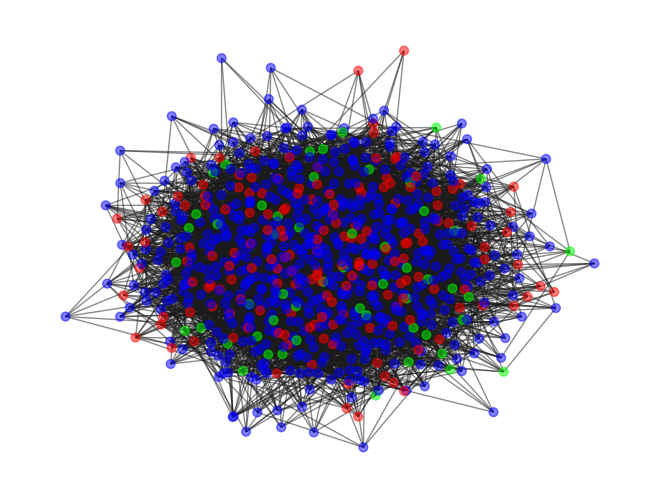

In [190]:
nx.draw(
    G = G_sbm, 
    node_size = 40, 
    node_color = node_attr_sbm, 
    alpha = .5, 
    cmap = plt.cm.brg
)

`G_fb_sbm` is an improvement of `G_fb_random`: it exhibts the correct attribute mixing pattern.

### Hashtags

#### Core detection by filtering co-selections
This method does not take the structure of relations into account. Cores are identified simply by **removing weakly weighted edges**. For the purpose of demonstrating this, we will work with the Social Network Science dataset and the use of scholarly languagein that field:

In [191]:
hashtags = hashtags.reset_index().sort_values(by='tweets_norm', ascending=False)
hashtags['cum_attention'] = (hashtags['tweets_norm'] / hashtags['tweets_norm'].sum()).cumsum()
hashtags = pd.merge(
    left = hashtags[['index', 'hashtag', 'tweets', 'tweets_norm']], 
    right = hashtags[['tweets_norm', 'cum_attention']].groupby(by='tweets_norm').max(), 
    on = 'tweets_norm'
).sort_values(by='index', ascending=True).set_index(keys='index')
hashtags.index.name = None
hashtags

hashtag  tweets  tweets_norm  cum_attention
0           covid19   86656   45937.6282       0.081022
1       coronavirus   40111   18312.8267       0.113322
2          covid_19   12570    5343.1000       0.122745
3          lockdown   12056    4538.2368       0.138920
4          stayhome   11508    4021.3275       0.153546
...             ...     ...          ...            ...
281291            🥒       1       0.0526       0.999806
281292            🥚       1       0.0526       0.999806
281293          🦇❤️       1       0.1667       0.989568
281294            🦠       1       0.1000       0.996721
281295            🧀       1       0.0526       0.999806

[281296 rows x 4 columns]

In [192]:
hashtag_cooccurrences = hashtag_cooccurrences.sort_values(by='cooccurrence_norm', ascending=False)
hashtag_cooccurrences['cum_attention'] = (hashtag_cooccurrences['cooccurrence_norm'] / hashtag_cooccurrences['cooccurrence_norm'].sum()).cumsum()
hashtag_cooccurrences = pd.merge(
    left = hashtag_cooccurrences[['hashtag_idx_i', 'hashtag_idx_j', 'cooccurrence', 'cooccurrence_norm']], 
    right = hashtag_cooccurrences[['cooccurrence_norm', 'cum_attention']].groupby(by='cooccurrence_norm').max().reset_index(), 
    on = 'cooccurrence_norm'
)
hashtag_cooccurrences

hashtag_idx_i  hashtag_idx_j  cooccurrence  cooccurrence_norm  \
0                    0              1         11642          2956.0353   
1                    4              6          2363           513.8860   
2                    1              2          2341           426.2425   
3                    0              3          1830           422.5268   
4                    0              4          1506           318.7245   
...                ...            ...           ...                ...   
1887199           2409           3057             1             0.0294   
1887200            795          24276             1             0.0294   
1887201            670           8845             1             0.0294   
1887202           4008          12988             1             0.0294   
1887203            942          11561             1             0.0294   

         cum_attention  
0             0.006616  
1             0.007766  
2             0.008720  
3             0.009666  
4             0.010379  
...                ...  
1887199       1.000000  
1887200       1.000000  
1887201       1.000000  
1887202       1.000000  
1887203       1.000000  

[1887204 rows x 5 columns]

Filter network to the core corresponding to the top 10% of the attention:

In [193]:
hashtag_cooccurrences_attention = hashtag_cooccurrences[hashtag_cooccurrences['cum_attention'] <= .1]

In [194]:
#hashtags = hashtags.sort_values(by='cum_attention', ascending=False)
#hashtag_cooccurrences_attention = hashtag_cooccurrences_attention.sort_values(by='cum_attention', ascending=False)

In [195]:
def get_attr_values(df, type_of_list, attr, node='name', source='name_u', target='name_v'):
    '''
    Transforms one or multiple columns of a nodelist or edgelist into a dictionary that can be used to set the node or edge attributes of a graph.
    
    Parameters:
        df : Pandas DataFrame
            Nodelist or edgelist that contains the node or edge attributes.
        type_of_list : String, either 'nodes' or 'edges'
            To specify if attribute values should be created for nodes or edges.
        attr : List
            List containing the names of the columns in df that contain the attribute values.
        name : String, only required if df is a 'nodes' type_of_list, default 'name'
            Column name of the nodelist containing the node labels.
        source : String, only required if df is an 'edges' type_of_list, default 'name_u'
            Column name of the edgelist containing the source node labels.
        target : String, only required if df is an 'edges' type_of_list, default 'name_v'
            Column name of the edgelist containing the target node labels.
    
    Returns:
        Dictionary with nodes or edges as keys and an attribute dictionary as values.
    '''
    df_ = df.copy()
    df_ = pd.DataFrame([df_[attr].to_dict('records')]).T
    if type_of_list == 'nodes':
        df_.index = df[node]
    if type_of_list == 'edges':
        df_.index = list(zip(df[source], df[target]))
    return list(df_.to_dict().values())[0]

In [196]:
G_hashtag_cooccurrences_core = nx.from_pandas_edgelist(
    df = hashtag_cooccurrences_attention, 
    source = 'hashtag_idx_i', 
    target = 'hashtag_idx_j', 
    edge_attr = ['cooccurrence', 'cooccurrence_norm'], 
    create_using = nx.Graph
)
#G_hashtag_cooccurrences_core.add_nodes_from(hashtags.index)
node_attr_hashtags = get_attr_values(df=hashtags.reset_index(), type_of_list='nodes', attr=['hashtag', 'tweets', 'tweets_norm'], node='index')
nx.set_node_attributes(G=G_hashtag_cooccurrences_core, values=node_attr_hashtags)

In [197]:
l_cc = sorted(nx.connected_components(G_hashtag_cooccurrences_core), key=len, reverse=True)
G_hashtag_cooccurrences_core_lcc = G_hashtag_cooccurrences_core.subgraph(l_cc[0])

In [198]:
pos_hashtag_cooccurrences_core_lcc_spring = nx.spring_layout(
    G = G_hashtag_cooccurrences_core_lcc, 
    weight = 'weight'
)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


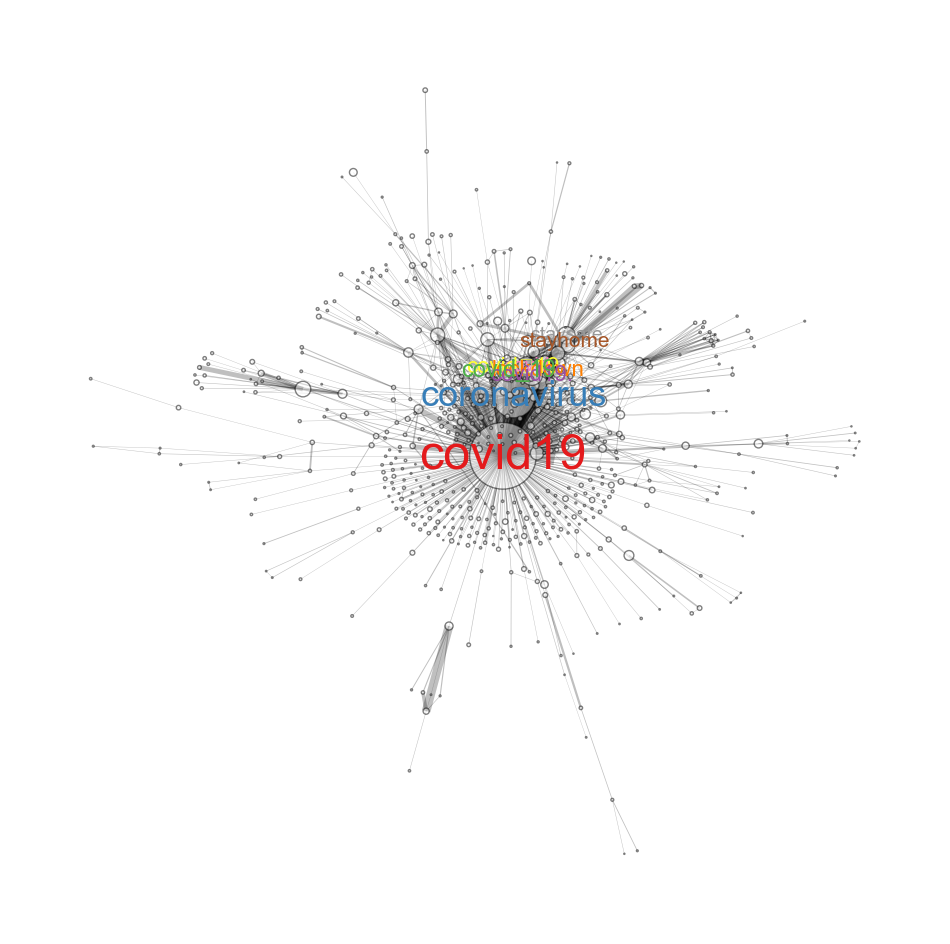

In [199]:
number_of_labels = 9 # G_hashtag_cooccurrences_core_lcc.number_of_nodes()

plt.figure(figsize=[12, 12])
nx.draw_networkx_nodes(
    G = G_hashtag_cooccurrences_core_lcc, 
    pos = pos_hashtag_cooccurrences_core_lcc_spring, 
    node_size = [node_size/20 for node_size in list(nx.get_node_attributes(G=G_hashtag_cooccurrences_core_lcc, name='tweets_norm').values())], 
    node_color = 'white', 
    alpha = .5, 
    linewidths = 1., 
    edgecolors = 'black'
)
nx.draw_networkx_edges(
    G = G_hashtag_cooccurrences_core_lcc, 
    pos = pos_hashtag_cooccurrences_core_lcc_spring, 
    width = [width/40 for width in list(nx.get_edge_attributes(G=G_hashtag_cooccurrences_core_lcc, name='cooccurrence_norm').values())], 
    edge_color = 'black', 
    alpha = .25, 
    node_size = [node_size/20 for node_size in list(nx.get_node_attributes(G=G_hashtag_cooccurrences_core_lcc, name='tweets_norm').values())]
)
nodes = hashtags.sort_values(by='tweets_norm', ascending=False).index.intersection(G_hashtag_cooccurrences_core_lcc.nodes())[:number_of_labels]
for i in reversed(range(number_of_labels)):
    nx.draw_networkx_labels(
        G = G_hashtag_cooccurrences_core_lcc, 
        pos = pos_hashtag_cooccurrences_core_lcc_spring, 
        labels = {nodes[i]: nx.get_node_attributes(G=G_hashtag_cooccurrences_core_lcc, name='hashtag')[nodes[i]]}, 
        font_size = int(nx.get_node_attributes(G=G_hashtag_cooccurrences_core_lcc, name='tweets_norm')[nodes[i]]**(1/3)), 
        font_color = plt.cm.Set1(i/number_of_labels), 
        alpha = 1.
    )
plt.box(False)

### Network modeling outlook

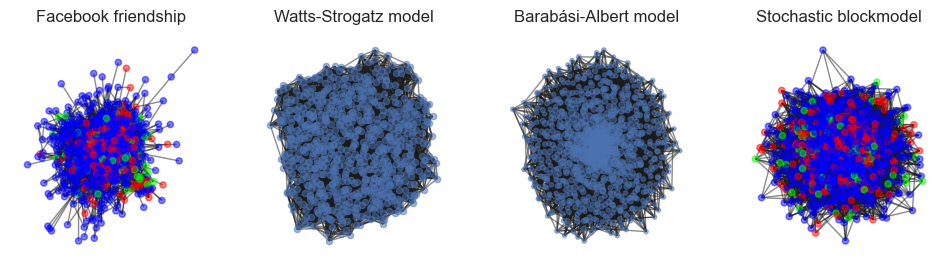

In [200]:
networks = [G_fb, G_ws, G_ba, G_sbm]
node_sizes = [20, 20, degree_ba, 20]
node_colors = [[data['sex'] for v, data in G_fb.nodes(data=True)], None, None, node_attr_sbm]
titles = ['Facebook friendship', 'Watts-Strogatz model', 'Barabási-Albert model', 'Stochastic blockmodel']

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
for i in range(4):
    axs[i].set_title(titles[i])
    nx.draw(
        G = networks[i], 
        ax = axs[i], 
        node_size = node_sizes[i], 
        node_color = node_colors[i], 
        alpha = .5, 
        cmap = plt.cm.brg
    )

## Commented references

### Recommended textbooks and NetworkX resources

Ma, E. & Seth, M. (2022). *Network Analysis Made Simple*. LeanPub. https://leanpub.com/nams. *An easy, well-maintained, and self-explanatory resource for NetworkX self-education that hides the inner workings of algorithms in custom functions. Use the [website](https://ericmjl.github.io/Network-Analysis-Made-Simple/) as a guide to Jupyter Notebooks on constructing, importing, exporting, and analyzing networks. You can also launch a binder session to execute notebooks in the cloud.*

Menczer, F., Fortunato, S., & Davis, C. A. (2020). *A First Course in Network Science*. Cambridge University Press. https://doi.org/10.1017/9781108653947. *An introductory course with exercises that emerged from years of teaching network analysis using NetworkX. Written from the physicist's perspective, this book is focused on the network science paradigms of small-world networks, scale-free networks, community detection, and complex systems modeling. The [website](https://cambridgeuniversitypress.github.io/FirstCourseNetworkScience/) provides all code in the form of Jupyter Notebooks, data, and solutions to the exercises.*

Platt, E. L. (2019). *Network Science with Python and NetworkX Quick Start Guide*. Packt. https://www.packtpub.com/product/network-science-with-python-and-networkx-quick-start-guide/9781789955316. *Systematic introduction to the practice of network preprocessing and analysis. Have a look at chapters 1–4 and 10–11 for the focus of session 2 here. All Jupyter Notebooks are publically available on the [website](https://github.com/PacktPublishing/Network-Science-with-Python-and-NetworkX-Quick-Start-Guide).*

### Advanced textbooks

Artime, O., Benigni, B., Bertagnolli, G., d'Andrea, V., Gallotti, R., Ghavasieh, A., Raimondo, S., & De Domenico, M. (2022). *Multilayer Network Science*. Cambridge University Press. https://doi.org/10.1017/9781009085809. *Interdisciplinary state-of-the-art account of the topic, quite advanced and mathematical.*

Caldarelli, G. & Chessa, A. (2016). *Data Science and Complex Networks: Real Case Studies with Python*. Oxford University Press. https://doi.org/10.1093/acprof:oso/9780199639601.001.0001. *Interdisciplinary display of case studies from the physics/complexity perspective. Jupyter Notebooks that use NetworkX but add many custom functions are available on the [website](https://github.com/datascienceandcomplexnetworks).*

### Other cited references

Breiger, R. L. (1974). "The duality of persons and groups". *Social Forces* 53:181–190. https://doi.org/10.1093/sf/53.2.181. *A fundamental paper about the sociological use of bipartite network structures.*

Freeman, L. (2004). *The Development of Social Network Analysis: A Study in the Sociology of Science*. Empirical Press. *The history of the field of Social Network Analysis as told by one of its founders.*

Fuhse, J. (2021). *Social Networks of Meaning and Communication*. Oxford University Press. https://doi.org/10.1093/oso/9780190275433.001.0001. *Accessible account of sociological network theory that delves deep into the mutual constitution of social networks and communication networks.*

Krempel, L. (2014). "Network visualization". In: Scott, J. & Carrington, P. J. (Eds.), *The SAGE Handbook of Social Network Analysis* (pp. 558-577). Sage. https://doi.org/10.4135/9781446294413. *A systematic overview how to visualize rich network information.*

Lee, M. & Martin, J. L. (2018). "Doorway to the dharma of duality". *Poetics* 68:18–30. https://doi.org/10.1016/j.poetic.2018.01.001. *A methodological account of socio-cultural analysis using publication data.*

Lietz, H., Schmitz, A., & Schaible, J. (2021). "Social Network Analysis with Digital Behavioral Data". *easy_social_sciences* 66:41–48. https://doi.org/10.15464/easy.2021.005. *A short and easily accessible introduction to the topic.*

Peixoto, T. P. (2015). "Inferring the mesoscale structure of layered, edge-valued, and time-varying networks". *Physical Review E* 92:042807. https://doi.org/10.1103/PhysRevE.92.042807. *Advanced stochastic analysis of various multilayer networks written in physics style.*

Sekara, V., Stopczynski, A., & Lehmann, S. (2016). "Fundamental structures of dynamic social networks". *Proceedings of the National Academy of Sciences* 113:9977–9982. https://doi.org/10.1073/pnas.1602803113. *Insightful multilayer analysis of the Copenhagen Networks Study interaction dataset.*

Sapiezynski, P., Stopczynski, A., Lassen, D. D., & Lehmann, S. (2019). "Interaction data from the Copenhagen Networks Study". *Scientific Data* 6:315 (2019). https://doi.org/10.1038/s41597-019-0325-x. *Description of one of the richest publicly available multilayer network datasets.*

<div class='alert alert-block alert-success'>
<b>Document information</b>

Contact and main author: Haiko Lietz

Contributors: ...

Acknowledgements: ...

Version date: XX. January 2023

License: ...
</div>

## PageRank 

__PageRank__ counts the number and quality of links to a node to determine a rough estimate of how important the node is. The underlying assumption is that more important nodes are likely to receive more edges from other nodes.

`pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)`
where `alpha` is a damping parameter for PageRank, default=0.85. Damping is (1-p_jump) where p_jump is likelihood of jumping to an arbitrary node.

Note: Undirected graphs will be converted to a directed graph with two directed edges for each undirected edge.

More details here https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html

In case of Directed weighted graph, the strength of each directed edge is taken into account. 

In case of Undirected weighted graph, the the strength of undirected edge would be assumed as bidirectional. In other words, PageRank is calculated on "artificial" directed graph. Meaning that we will overestimate the strength of some edges. 

In [201]:
#PageRanks of undirected network and of directed network, 
# where each directed edge has the same weight as undirected edge

#We can create directed graph from undirected, though we just replace each edge (u, v, data) 
#with two directed edges (u, v, data) and (v, u, data) 
#G_simple_directed = G_simple.to_directed()

#pd.DataFrame({"undirected":nx.pagerank(G_singleplex_undirected,alpha=0.9),
#              "directed_bidorectional":nx.pagerank(G_singleplex_undirected.to_directed(),alpha=0.9)} )

### Advanced notes on PageRank calculation for Multigraph

To calculate PageRank on multilayered graphs one can use

`nx.pagerank_numpy(G, alpha=0.9)`
 or
`nx.pagerank_scipy(G, alpha=0.9)`

>This implementation works with Multi(Di)Graphs. For multigraphs the weight between two nodes is set to be the sum of all edge weights between those nodes.

More details here:
- https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank_numpy.html
- https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank_scipy.html

#### Notes to be removed before publication

- ...